# BT4012 Project: Data Preprocessing & Feature Engineering
### Completed by: Group 8

# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load Datasets & Basic EDA

#### Train set

In [2]:
train_df = pd.read_csv('../data/preliminary/train.csv')
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1072349,2020-03-21 19:05:27,2242542703101233,fraud_Bahringer Group,health_fitness,1.40,Samuel,Jenkins,M,43235 Mckenzie Views Apt. 837,...,38.4921,-85.4524,564,Pensions consultant,1996-04-10,5a4c5bc47fd9ca60a9cdbe38423654b4,1363892727,37.965322,-85.661501,0
1,1123019,2020-04-12 21:34:21,4469777115158234880,"fraud_Douglas, Schneider and Turner",shopping_pos,9.73,Gregory,Graham,M,4005 Dana Glens,...,42.7280,-71.1810,47249,Market researcher,1980-11-22,af686a90fb3eff86e0a961d852550619,1365802461,43.044230,-71.136907,0
2,1287799,2020-06-17 16:24:29,4312133045694601139,fraud_Fritsch and Sons,health_fitness,21.84,Julian,Price,M,086 Pierce Cove,...,39.3764,-76.7290,33917,Company secretary,1977-06-12,f70fea505c5a765825aafb72d18c1aa5,1371486269,39.365746,-77.165503,0
3,640815,2019-09-29 19:34:07,30029052116970,fraud_Wiza LLC,misc_pos,8.16,Curtis,Young,M,4319 Watson Shoals Suite 658,...,42.1239,-79.1895,3833,Metallurgist,1970-10-09,61d6b585be9cad4fd36409019b693aaa,1348947247,42.692928,-78.435859,0
4,668880,2019-10-12 14:38:12,3500969075198072,fraud_Predovic Inc,shopping_net,184.55,Kenneth,Sanchez,M,0110 Ashley Forest,...,47.2271,-117.0819,895,Clothing/textile technologist,1999-05-31,e7fc0dc8be81974dacd6fc4c7e3c5362,1350052692,47.861069,-116.983182,0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             240000 non-null  int64  
 1   trans_date_trans_time  240000 non-null  object 
 2   cc_num                 240000 non-null  int64  
 3   merchant               240000 non-null  object 
 4   category               240000 non-null  object 
 5   amt                    240000 non-null  float64
 6   first                  240000 non-null  object 
 7   last                   240000 non-null  object 
 8   gender                 240000 non-null  object 
 9   street                 240000 non-null  object 
 10  city                   240000 non-null  object 
 11  state                  240000 non-null  object 
 12  zip                    240000 non-null  int64  
 13  lat                    240000 non-null  float64
 14  long                   240000 non-nu

In [4]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,2.400000e+05,2.400000e+05,240000.000000,240000.000000,240000.000000,240000.000000,2.400000e+05,2.400000e+05,240000.000000,240000.000000,240000.000000
mean,6.461744e+05,4.209063e+17,82.137978,48760.114425,38.545540,-90.204605,8.918851e+04,1.349169e+09,38.544598,-90.204016,0.030550
std,3.751697e+05,1.314206e+18,182.731529,26920.620431,5.069207,13.757986,3.032851e+05,1.287179e+07,5.104405,13.770584,0.172095
min,1.000000e+00,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.031242,-166.664828,0.000000
25%,3.207442e+05,1.800429e+14,9.840000,26237.000000,34.668900,-96.798000,7.430000e+02,1.338673e+09,34.754159,-96.888902,0.000000
50%,6.455065e+05,3.521417e+15,48.580000,48174.000000,39.371600,-87.461600,2.456000e+03,1.349109e+09,39.375016,-87.430950,0.000000
75%,9.708892e+05,4.651007e+15,86.140000,72011.000000,41.940400,-80.138100,2.032800e+04,1.359301e+09,41.953029,-80.212441,0.000000
max,1.296673e+06,4.992346e+18,15047.030000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371817e+09,67.510267,-66.959178,1.000000


#### Validation set

In [5]:
validation_df = pd.read_csv('../data/preliminary/validation.csv')
validation_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1032241,2020-03-03 14:32:35,4906628655840914250,fraud_Feil-Morar,health_fitness,283.13,Charles,Moreno,M,838 Franklin Prairie Apt. 902,...,24.6557,-81.3824,32891,Town planner,1987-02-13,cad774f9be5e482b8a7eb4bb10c3893d,1362321155,25.512218,-82.292661,0
1,921195,2019-12-30 21:32:22,571365235126,fraud_Jakubowski Group,food_dining,6.57,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,...,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,e1cf7e14ffbb8ac4888982f79147694a,1356903142,44.034668,-85.607445,0
2,869168,2019-12-19 23:13:48,4755696071492,fraud_Erdman-Ebert,personal_care,12.23,Robert,Evans,M,01892 Patricia Vista Apt. 828,...,32.9643,-96.6012,20328,Site engineer,1985-06-20,2729c48fe5eb11ab671aa3341236cebc,1355958828,32.598802,-96.689835,0
3,956492,2020-01-19 14:48:11,370612217861404,"fraud_Greenholt, O'Hara and Balistreri",shopping_net,6.35,Amanda,Fitzgerald,F,298 Kayla Lights,...,40.1159,-74.8536,21125,"Administrator, charities/voluntary organisations",1985-05-25,36d2a37aab561bb9335e82f1df4f96c7,1358606891,39.889060,-75.542567,0
4,263801,2019-05-11 13:45:14,4378993458389626,"fraud_Schneider, Hayes and Nikolaus",food_dining,2.93,Travis,Hayes,M,1561 Chase Grove,...,43.9742,-71.1503,3807,Surgeon,1999-10-25,32a8bdeca822ad81674e544dbddc3ef3,1336743914,43.643013,-70.210856,0


In [6]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             30000 non-null  int64  
 1   trans_date_trans_time  30000 non-null  object 
 2   cc_num                 30000 non-null  int64  
 3   merchant               30000 non-null  object 
 4   category               30000 non-null  object 
 5   amt                    30000 non-null  float64
 6   first                  30000 non-null  object 
 7   last                   30000 non-null  object 
 8   gender                 30000 non-null  object 
 9   street                 30000 non-null  object 
 10  city                   30000 non-null  object 
 11  state                  30000 non-null  object 
 12  zip                    30000 non-null  int64  
 13  lat                    30000 non-null  float64
 14  long                   30000 non-null  float64
 15  ci

In [7]:
validation_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,3.000000e+04,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,6.493316e+05,4.190471e+17,69.693680,48922.285433,38.577930,-90.303841,8.799095e+04,1.349286e+09,38.579220,-90.303098,0.005800
std,3.720990e+05,1.310421e+18,148.140514,26928.110504,5.058415,13.797428,2.977069e+05,1.276236e+07,5.090231,13.813347,0.075938
min,2.300000e+01,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325377e+09,19.041880,-166.656560,0.000000
25%,3.315445e+05,1.800429e+14,9.590000,26237.000000,34.668900,-96.917700,7.440000e+02,1.339036e+09,34.768844,-96.976487,0.000000
50%,6.481560e+05,3.518759e+15,47.125000,48202.000000,39.401500,-87.591700,2.457000e+03,1.349240e+09,39.414335,-87.496679,0.000000
75%,9.726132e+05,4.642255e+15,82.682500,72042.000000,42.014400,-80.158000,2.032800e+04,1.359392e+09,41.984748,-80.251130,0.000000
max,1.296579e+06,4.992346e+18,9999.390000,99783.000000,65.689900,-67.950300,2.906700e+06,1.371814e+09,66.554249,-66.962913,1.000000


#### Test set

In [8]:
test_df = pd.read_csv('../data/preliminary/test.csv')
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,315706,2020-10-19 12:30:31,3566094707272327,"fraud_Hintz, Bauch and Smith",health_fitness,38.09,Kristina,Stewart,F,47029 Jimmy Tunnel Apt. 106,...,34.3795,-118.5230,34882,Health physicist,1971-04-25,bc12159fcac8af1773fef1d8a1302731,1382185831,34.809923,-118.111582,0
1,151754,2020-08-13 05:57:47,2610529083834453,fraud_Hackett-Lueilwitz,grocery_pos,206.44,Tanya,Dickerson,F,053 Kim Valley Suite 928,...,36.2416,-86.6117,22191,Prison officer,1994-07-27,3b1d9ac4a26f3c56b0cf4cc407250f8d,1376373467,36.644354,-87.480427,0
2,189099,2020-08-26 05:06:42,4873783502705038,fraud_Bahringer-Larson,grocery_net,51.76,Elizabeth,Maxwell,F,194 Goodman Fall Apt. 569,...,48.4786,-122.3345,14871,Public house manager,1974-03-10,6975ab8f7f26df75cc6046b07f7ceeb5,1377493602,48.784813,-123.198143,0
3,249823,2020-09-20 18:44:30,5540636818935089,fraud_Jakubowski Group,food_dining,89.38,Kenneth,Foster,M,329 Michael Extension,...,42.6911,-71.1605,76383,Geoscientist,1985-04-04,ee19c9619769485a654364e035b4c01f,1379702670,42.893355,-70.856259,0
4,487280,2020-12-16 13:22:16,213163860545705,"fraud_Lowe, Dietrich and Erdman",kids_pets,41.72,Mark,Tyler,M,82201 Bradley Radial Suite 703,...,33.1410,-82.5150,741,Claims inspector/assessor,1986-04-28,dac5f5438277e192aabd02e93ee6e1a1,1387200136,33.597864,-83.314567,0


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             30000 non-null  int64  
 1   trans_date_trans_time  30000 non-null  object 
 2   cc_num                 30000 non-null  int64  
 3   merchant               30000 non-null  object 
 4   category               30000 non-null  object 
 5   amt                    30000 non-null  float64
 6   first                  30000 non-null  object 
 7   last                   30000 non-null  object 
 8   gender                 30000 non-null  object 
 9   street                 30000 non-null  object 
 10  city                   30000 non-null  object 
 11  state                  30000 non-null  object 
 12  zip                    30000 non-null  int64  
 13  lat                    30000 non-null  float64
 14  long                   30000 non-null  float64
 15  ci

In [10]:
test_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,30000.00000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,277464.05040,4.207335e+17,68.397767,48772.515967,38.525190,-90.191732,8.723634e+04,1.380664e+09,38.528262,-90.188371,0.003867
std,160266.89681,1.314877e+18,133.799863,26860.632527,5.036476,13.633923,2.932312e+05,5.197068e+06,5.072750,13.647435,0.062063
min,2.00000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.669812,0.000000
25%,139562.50000,1.800365e+14,9.570000,26237.000000,34.668900,-96.787900,7.430000e+02,1.376049e+09,34.764436,-96.890949,0.000000
50%,275507.00000,3.519607e+15,47.600000,48174.000000,39.371600,-87.461600,2.456000e+03,1.380655e+09,39.395308,-87.423744,0.000000
75%,416561.50000,4.642255e+15,83.152500,72011.000000,41.846700,-80.175200,2.036550e+04,1.385863e+09,41.950252,-80.217881,0.000000
max,555710.00000,4.992346e+18,8517.380000,99783.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.671540,-66.985234,1.000000


# Data Preprocessing

### Steps
- Missing values (train, validation, test)
- Duplicate values (train, validation, test)
- Outliers (train, validation, test)
- Breaking down datetime columns (train, validation, test)
- Removing unnecessary features (train, validation, test)
- Resampling: oversampling fraud/undersampling non-fraud (train)
- Scaling: Standardisation/Normalisation (train, validation, test)
- Encoding (train: fit & transform, validation: transform, test: transform)

### Features

- `Unnamed: 0`: Index column (to be removed)
- `trans_date_trans_time`: Transaction DateTime
- `cc_num`: Credit Card Number of Customer
- `merchant`: Merchant Name
- `category`: Category of Merchant
- `amt`: Amount of Transaction
- `first`: First Name of Credit Card Holder
- `last`: Last Name of Credit Card Holder
- `gender`: Gender of Credit Card Holder
- `street`: Street Address of Credit Card Holder
- `city`: City of Credit Card Holder
- `state`: State of Credit Card Holder
- `zip`: Zip Code of Credit Card Holder
- `lat`: Latitude Location of Credit Card Holder
- `long`: Longitude Location of Credit Card Holder
- `city_pop`: Credit Card Holder's City Population
- `job`: Job of Credit Card Holder
- `dob`: Date of Birth of Credit Card Holder
- `trans_num`: Transaction Number
- `unix_time`: UNIX Time of Transaction
- `merch_lat`: Latitude Location of Merchant
- `merch_long`: Longitude Location of Merchant
- `is_fraud`: Fraud Flag (Target Class)

Variables to Scale: `amt`, `unix_time`, `city_pop`
Variables to Encode: `merchant`, `category`, `gender`, `city`, `state`

Variables to Remove:
- `Unnamed: 0`: Index column (not needed)
- `street`: Overlaps with other features (address breakdown)
- `zip`: Redundant with city and state
- `trans_num`: Unique identifier, not useful for modeling
- `first`: Redundant (can be inferred from job or other features)
- `last`: Redundant (can be inferred from job or other features)

Variables to Feature Engineer:
- `trans_date_trans_time`: Break down into year, month, day, hour, minute, second
- `dob`: Create age and additional date-based features
- `lat`, `long`, `merch_lat`, `merch_long`: Geospatial features, distance, and clustering
- `cc_num`: Card issuer and possible clustering
- `job`: Clustering based on job title

## Splitting train_df, validation_df, test_df into each of their X and y

In [11]:
# split train df, validation df, test df into each of their X and y
y_train = train_df.pop('is_fraud')
X_train = train_df

y_valid = validation_df.pop('is_fraud')
X_valid = validation_df

y_test = test_df.pop('is_fraud')
X_test = test_df

## Handling Missing Values
In this section, we will look for any missing values in the train, validation, and test sets. If there are missing values, we will handle them by imputation.

#### Train set

In [12]:
# check for na values
X_train.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
dtype: int64

#### Validation set

In [13]:
# check for na values
X_valid.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
dtype: int64

#### Test set

In [14]:
# check for na values
X_test.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
dtype: int64

As seen from above, there are no missing values in the train, validation, and test sets.

## Handling Duplicates

In this section, we will check for any duplicate rows in the train, validation, and test sets. If duplicates are found, we will remove them to ensure the integrity of the dataset.

#### Train set

In [15]:
X_train[X_train.duplicated()]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long


#### Validation set

In [16]:
X_valid[X_valid.duplicated()]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long


#### Test set

In [17]:
X_test[X_test.duplicated()]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long


As seen from above, there are no duplicate rows in the train, validation, and test sets.

## Handling Outliers
In this section, we will look for outliers in the train, validation, and test sets. If there are outliers, we will handle them by imputation, removing, etc.

The following checks will be performed to analyze potential outliers in the dataset:

- Verify that the `trans_date_trans_time` column matches with the corresponding `unix_time`.
- Ensure that for `dob`, the day is between 1 and 31, the month is between 1 and 12, and the year is not excessively old or recent. This can be done using histograms.
- Plot a barplot to check the distribution of `category` and `gender` for any anomalies.
- Create boxplots to visually inspect for outliers in `amt` and `city_pop`.
- Verify that `lat` and `merch_lat` are within the valid range of -90 to 90 (inclusive), and that `long` and `merch_long` are within the range of -180 to 180 (inclusive).


#### Train set

In [18]:
import datetime
import time

# check that trans_date_trans_time matches with unix_time
X_train['trans_date_trans_time'] = pd.to_datetime(X_train['trans_date_trans_time'])
X_train['unix_derived'] = X_train['trans_date_trans_time'].apply(lambda x: int(datetime.datetime.timestamp(x)))
mismatch_train = X_train[X_train['unix_time'] != X_train['unix_derived']]
X_train = X_train.drop(columns=['unix_derived'])
mismatch_train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,unix_derived
0,1072349,2020-03-21 19:05:27,2242542703101233,fraud_Bahringer Group,health_fitness,1.40,Samuel,Jenkins,M,43235 Mckenzie Views Apt. 837,...,38.4921,-85.4524,564,Pensions consultant,1996-04-10,5a4c5bc47fd9ca60a9cdbe38423654b4,1363892727,37.965322,-85.661501,1584788727
1,1123019,2020-04-12 21:34:21,4469777115158234880,"fraud_Douglas, Schneider and Turner",shopping_pos,9.73,Gregory,Graham,M,4005 Dana Glens,...,42.7280,-71.1810,47249,Market researcher,1980-11-22,af686a90fb3eff86e0a961d852550619,1365802461,43.044230,-71.136907,1586698461
2,1287799,2020-06-17 16:24:29,4312133045694601139,fraud_Fritsch and Sons,health_fitness,21.84,Julian,Price,M,086 Pierce Cove,...,39.3764,-76.7290,33917,Company secretary,1977-06-12,f70fea505c5a765825aafb72d18c1aa5,1371486269,39.365746,-77.165503,1592382269
3,640815,2019-09-29 19:34:07,30029052116970,fraud_Wiza LLC,misc_pos,8.16,Curtis,Young,M,4319 Watson Shoals Suite 658,...,42.1239,-79.1895,3833,Metallurgist,1970-10-09,61d6b585be9cad4fd36409019b693aaa,1348947247,42.692928,-78.435859,1569756847
4,668880,2019-10-12 14:38:12,3500969075198072,fraud_Predovic Inc,shopping_net,184.55,Kenneth,Sanchez,M,0110 Ashley Forest,...,47.2271,-117.0819,895,Clothing/textile technologist,1999-05-31,e7fc0dc8be81974dacd6fc4c7e3c5362,1350052692,47.861069,-116.983182,1570862292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,589692,2019-09-07 16:09:20,4079773899158,fraud_Waelchi Inc,kids_pets,12.88,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,5dbc1fa717e840c81823e095d955bbbf,1347034160,44.798352,-116.632527,1567843760
239996,314690,2019-06-01 06:52:28,180064817343047,"fraud_Schuppe, Nolan and Hoeger",shopping_pos,1.63,Patricia,Gonzalez,F,8973 Mark Drive,...,37.9048,-86.5240,344,Chartered public finance accountant,1967-03-30,8eaf8a4778b3e680c65d518543926b06,1338533548,38.157359,-85.857702,1559343148
239997,1194213,2020-05-13 20:14:00,30408301059761,fraud_Hilpert-Conroy,kids_pets,40.69,Brandon,Pittman,M,2881 Frey Village,...,33.3364,-80.1859,4471,Occupational hygienist,1973-10-09,d8b06bc69af2831cbd158ab5ca7bd200,1368476040,33.821302,-81.055067,1589372040
239998,1073052,2020-03-22 02:48:25,38057513087029,fraud_Luettgen PLC,gas_transport,47.25,Marissa,Clark,F,2677 Byrd Village Suite 035,...,37.3304,-121.7913,973849,Geoscientist,1997-01-18,3100d31fbc201be7bdd07faa0ee1d37b,1363920505,38.272782,-122.041386,1584816505


In [19]:
# check that dob makes sense: day is 1-31, month is 1-12
X_train['dob'] = pd.to_datetime(X_train['dob'])
X_train['dob_year'] = X_train['dob'].dt.year
X_train['dob_month'] = X_train['dob'].dt.month
X_train['dob_day'] = X_train['dob'].dt.day

wrong_days_train = len(X_train[(X_train['dob_day'] < 1) | (X_train['dob_day'] > 31)])
wrong_months_train = len(X_train[(X_train['dob_month'] < 1) | (X_train['dob_month'] > 12)])
print('Number of incorrect days in train set:', wrong_days_train)
print('Number of incorrect months in train set:', wrong_months_train)

Number of incorrect days in train set: 0
Number of incorrect months in train set: 0


Oldest birth year in train set: 1924
Latest birth year in train set: 2005


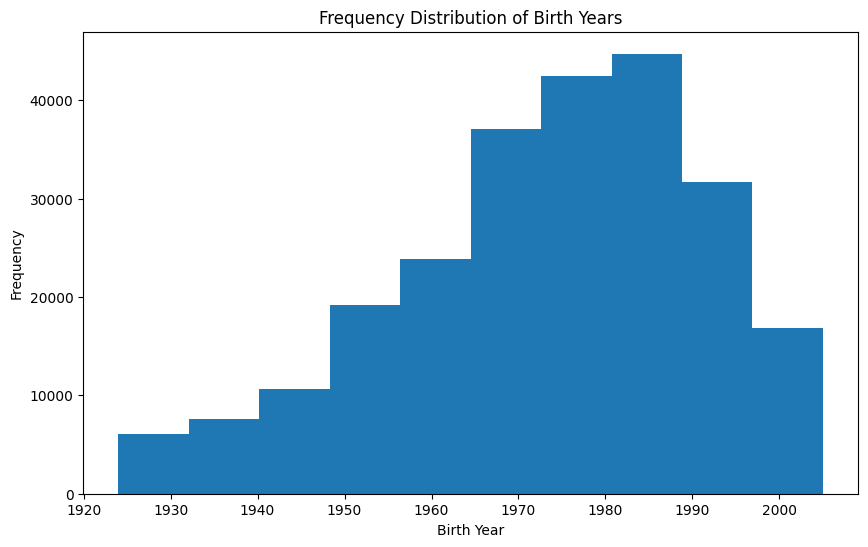

In [20]:
# check that dob makes sense: year is not overly old or recent
min_dob_year_train = X_train['dob_year'].min()
max_dob_year_train = X_train['dob_year'].max()
print('Oldest birth year in train set:', min_dob_year_train)
print('Latest birth year in train set:', max_dob_year_train)

plt.figure(figsize=(10, 6))
plt.hist(X_train['dob_year'])
plt.title('Frequency Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

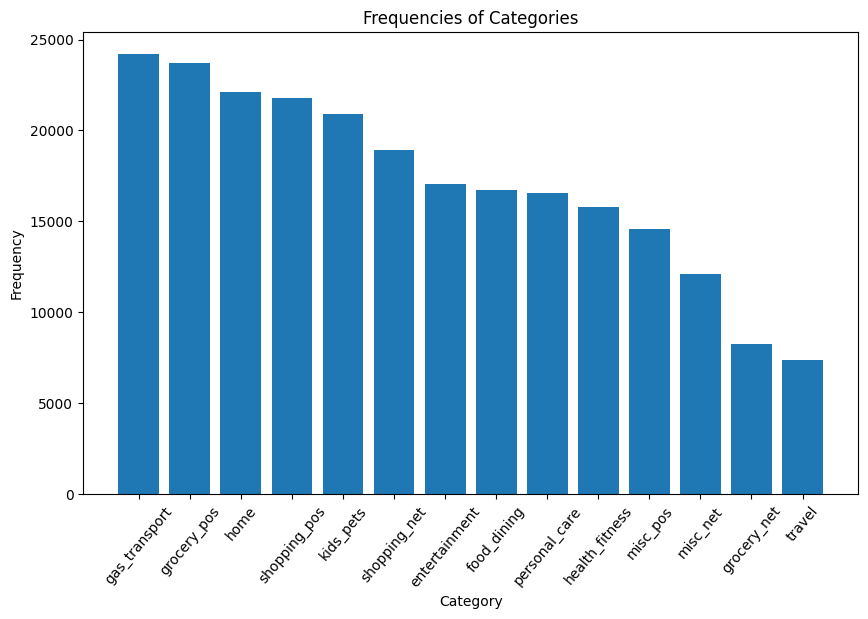

In [21]:
# barplot for category
cat_counts_train = X_train['category'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(list(cat_counts_train.index), cat_counts_train.values)
plt.title('Frequencies of Categories')
plt.xlabel('Category')
plt.xticks(rotation=50)
plt.ylabel('Frequency')
plt.show()

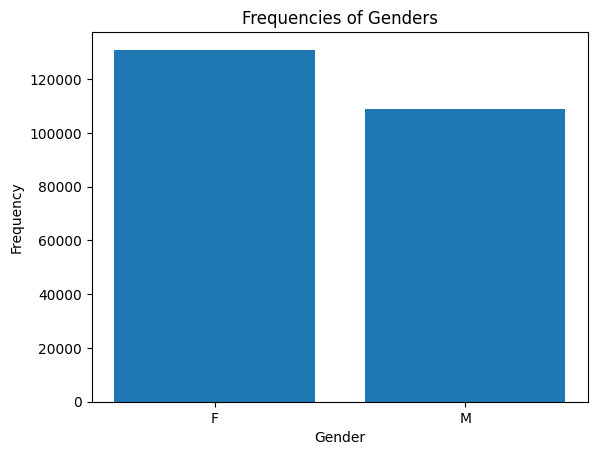

In [22]:
# barplot for gender
gender_counts_train = X_train['gender'].value_counts()

plt.figure()
plt.bar(list(gender_counts_train.index), gender_counts_train.values)
plt.title('Frequencies of Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

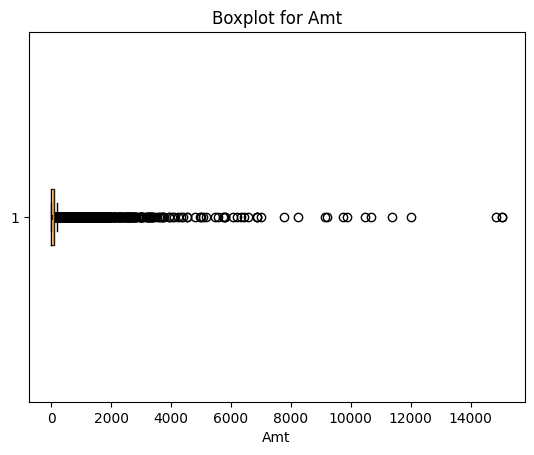

In [23]:
# boxplot for amt
plt.figure()
plt.boxplot(X_train['amt'], vert=False)
plt.title('Boxplot for Amt')
plt.xlabel('Amt')
plt.show()

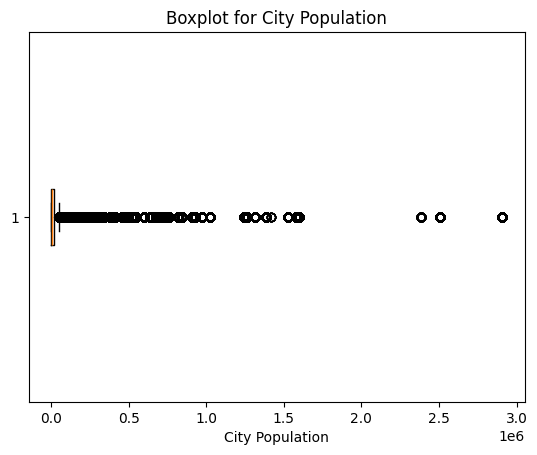

In [24]:
# boxplot for city_pop
plt.figure()
plt.boxplot(X_train['city_pop'], vert=False)
plt.title('Boxplot for City Population')
plt.xlabel('City Population')
plt.show()

In [25]:
# check that lat, merch_lat are between -90 and 90 inclusive
# check that long, merch_long are between -180 and 180 inclusive
print('Number of incorrect lat in train set:', len(X_train[(X_train['lat'] < -90) | (X_train['lat'] > 90)]))
print('Number of incorrect long in train set:', len(X_train[(X_train['long'] < -180) | (X_train['long'] > 180)]))
print('Number of incorrect merch_lat in train set:', len(X_train[(X_train['merch_lat'] < -90) | (X_train['merch_lat'] > 90)]))
print('Number of incorrect merch_long in train set:', len(X_train[(X_train['merch_long'] < -180) | (X_train['merch_long'] > 180)]))

Number of incorrect lat in train set: 0
Number of incorrect long in train set: 0
Number of incorrect merch_lat in train set: 0
Number of incorrect merch_long in train set: 0


From the outlier analysis above, we have decided not to remove any data as outliers from the train set. However, an issue was found with the `trans_date_trans_time` and `unix_time` columns. When converting each value of `trans_date_trans_time` to its corresponding Unix timestamp, the derived Unix timestamp does not match the existing `unix_time` values.

Further investigation is needed, and we may need to remove the `unix_time` feature if this mismatch cannot be resolved.

#### Validation set

In [26]:
# check that trans_date_trans_time matches with unix_time
X_valid['trans_date_trans_time'] = pd.to_datetime(X_valid['trans_date_trans_time'])
X_valid['unix_derived'] = X_valid['trans_date_trans_time'].apply(lambda x: int(datetime.datetime.timestamp(x)))
mismatch_valid = X_valid[X_valid['unix_time'] != X_valid['unix_derived']]
X_valid = X_valid.drop(columns=['unix_derived'])
mismatch_valid

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,unix_derived
0,1032241,2020-03-03 14:32:35,4906628655840914250,fraud_Feil-Morar,health_fitness,283.13,Charles,Moreno,M,838 Franklin Prairie Apt. 902,...,24.6557,-81.3824,32891,Town planner,1987-02-13,cad774f9be5e482b8a7eb4bb10c3893d,1362321155,25.512218,-82.292661,1583217155
1,921195,2019-12-30 21:32:22,571365235126,fraud_Jakubowski Group,food_dining,6.57,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,...,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,e1cf7e14ffbb8ac4888982f79147694a,1356903142,44.034668,-85.607445,1577712742
2,869168,2019-12-19 23:13:48,4755696071492,fraud_Erdman-Ebert,personal_care,12.23,Robert,Evans,M,01892 Patricia Vista Apt. 828,...,32.9643,-96.6012,20328,Site engineer,1985-06-20,2729c48fe5eb11ab671aa3341236cebc,1355958828,32.598802,-96.689835,1576768428
3,956492,2020-01-19 14:48:11,370612217861404,"fraud_Greenholt, O'Hara and Balistreri",shopping_net,6.35,Amanda,Fitzgerald,F,298 Kayla Lights,...,40.1159,-74.8536,21125,"Administrator, charities/voluntary organisations",1985-05-25,36d2a37aab561bb9335e82f1df4f96c7,1358606891,39.889060,-75.542567,1579416491
4,263801,2019-05-11 13:45:14,4378993458389626,"fraud_Schneider, Hayes and Nikolaus",food_dining,2.93,Travis,Hayes,M,1561 Chase Grove,...,43.9742,-71.1503,3807,Surgeon,1999-10-25,32a8bdeca822ad81674e544dbddc3ef3,1336743914,43.643013,-70.210856,1557553514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,44712,2019-01-27 16:48:53,377026671291680,"fraud_Mosciski, Ziemann and Farrell",shopping_net,2.63,Jackie,Davis,F,1898 Parker Fork Apt. 057,...,37.3272,-91.0243,241,Investment analyst,1974-10-27,3d65d2c01f32f52053024069131f8d61,1327682933,36.489105,-91.490362,1548578933
29996,1003095,2020-02-16 03:04:59,5501083170975659,"fraud_McCullough, Hudson and Schuster",food_dining,34.38,Wayne,Payne,M,587 Bradley Inlet Suite 281,...,41.1464,-81.5107,47772,Equities trader,1966-01-04,91f3f097d544a3c55ccdd943d71d800d,1360983899,40.890814,-80.648953,1581793499
29997,1041188,2020-03-08 05:22:23,213148039875802,fraud_Miller-Hauck,grocery_pos,180.93,Jill,Jacobs,F,034 Kimberly Mountains,...,27.9551,-82.2966,79613,Environmental consultant,1978-11-30,89b9ad0cf992735221405d43ea94f612,1362720143,28.457183,-81.521990,1583616143
29998,477760,2019-07-28 19:07:55,3535808924394848,fraud_Rolfson-Kunde,personal_care,74.48,Matthew,Myers,M,4936 Michelle Points,...,39.3900,-88.9597,1532,Radio broadcast assistant,1980-01-09,593bdc0a78787937f830255da11fc6ab,1343502475,40.291688,-89.521832,1564312075


In [27]:
# check that dob makes sense: day is 1-31, month is 1-12
X_valid['dob'] = pd.to_datetime(X_valid['dob'])
X_valid['dob_year'] = X_valid['dob'].dt.year
X_valid['dob_month'] = X_valid['dob'].dt.month
X_valid['dob_day'] = X_valid['dob'].dt.day

wrong_days_valid = len(X_valid[(X_valid['dob_day'] < 1) | (X_valid['dob_day'] > 31)])
wrong_months_valid = len(X_valid[(X_valid['dob_month'] < 1) | (X_valid['dob_month'] > 12)])
print('Number of incorrect days in validation set:', wrong_days_valid)
print('Number of incorrect months in validation set:', wrong_months_valid)

Number of incorrect days in validation set: 0
Number of incorrect months in validation set: 0


Oldest birth year in validation set: 1924
Latest birth year in validation set: 2005


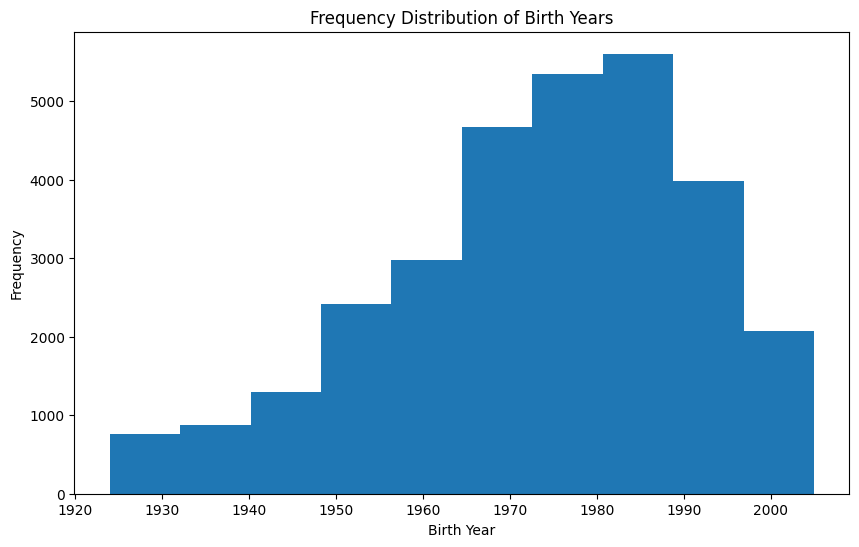

In [28]:
# check that dob makes sense: year is not overly old or recent
min_dob_year_valid = X_valid['dob_year'].min()
max_dob_year_valid = X_valid['dob_year'].max()
print('Oldest birth year in validation set:', min_dob_year_valid)
print('Latest birth year in validation set:', max_dob_year_valid)

plt.figure(figsize=(10, 6))
plt.hist(X_valid['dob_year'])
plt.title('Frequency Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

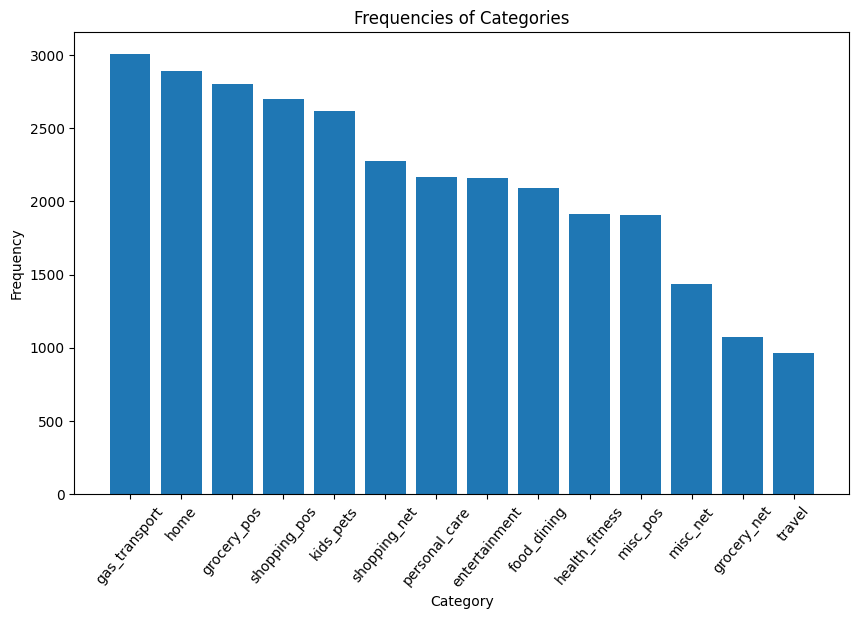

In [29]:
# barplot for category
cat_counts_valid = X_valid['category'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(list(cat_counts_valid.index), cat_counts_valid.values)
plt.title('Frequencies of Categories')
plt.xlabel('Category')
plt.xticks(rotation=50)
plt.ylabel('Frequency')
plt.show()

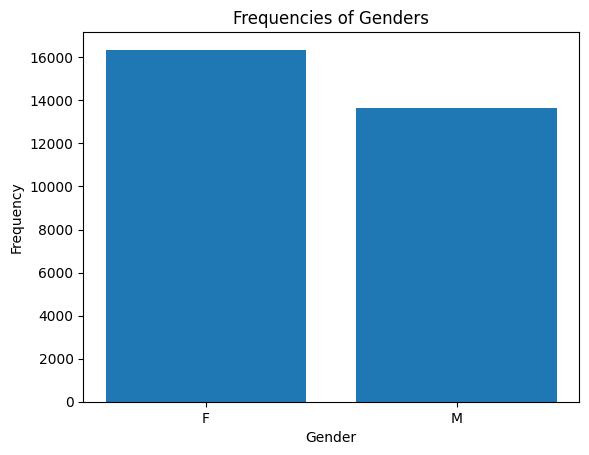

In [30]:
# barplot for gender
gender_counts_valid = X_valid['gender'].value_counts()

plt.figure()
plt.bar(list(gender_counts_valid.index), gender_counts_valid.values)
plt.title('Frequencies of Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

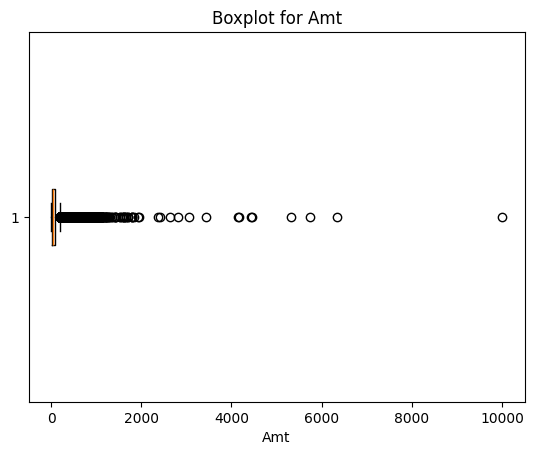

In [31]:
# boxplot for amt
plt.figure()
plt.boxplot(X_valid['amt'], vert=False)
plt.title('Boxplot for Amt')
plt.xlabel('Amt')
plt.show()

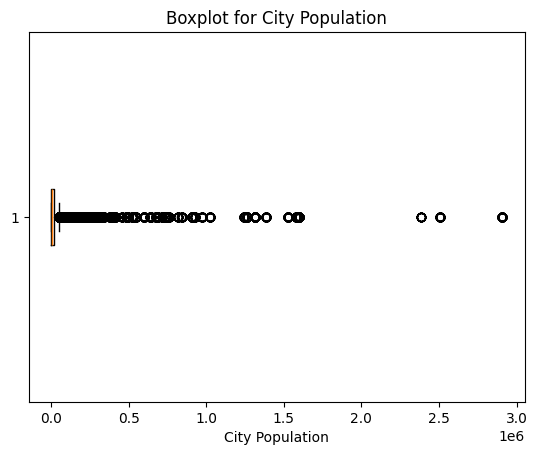

In [32]:
# boxplot for city_pop
plt.figure()
plt.boxplot(X_valid['city_pop'], vert=False)
plt.title('Boxplot for City Population')
plt.xlabel('City Population')
plt.show()

In [33]:
# check that lat, merch_lat are between -90 and 90 inclusive
# check that long, merch_long are between -180 and 180 inclusive
print('Number of incorrect lat in validation set:', len(X_valid[(X_valid['lat'] < -90) | (X_valid['lat'] > 90)]))
print('Number of incorrect long in validation set:', len(X_valid[(X_valid['long'] < -180) | (X_valid['long'] > 180)]))
print('Number of incorrect merch_lat in validation set:', len(X_valid[(X_valid['merch_lat'] < -90) | (X_valid['merch_lat'] > 90)]))
print('Number of incorrect merch_long in validation set:', len(X_valid[(X_valid['merch_long'] < -180) | (X_valid['merch_long'] > 180)]))

Number of incorrect lat in validation set: 0
Number of incorrect long in validation set: 0
Number of incorrect merch_lat in validation set: 0
Number of incorrect merch_long in validation set: 0


From the outlier analysis above, we have decided not to remove any data as outliers from the validation set. However, an issue was identified with the `trans_date_trans_time` and `unix_time` columns. When converting each value of `trans_date_trans_time` to its corresponding Unix timestamp, the derived Unix timestamp does not match the existing `unix_time` values.

Further investigation is required, and we may need to remove the `unix_time` feature if this discrepancy cannot be resolved.


#### Test set

In [34]:
# check that trans_date_trans_time matches with unix_time
X_test['trans_date_trans_time'] = pd.to_datetime(X_test['trans_date_trans_time'])
X_test['unix_derived'] = X_test['trans_date_trans_time'].apply(lambda x: int(datetime.datetime.timestamp(x)))
mismatch_test = X_test[X_test['unix_time'] != X_test['unix_derived']]
X_test = X_test.drop(columns=['unix_derived'])
mismatch_test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,unix_derived
0,315706,2020-10-19 12:30:31,3566094707272327,"fraud_Hintz, Bauch and Smith",health_fitness,38.09,Kristina,Stewart,F,47029 Jimmy Tunnel Apt. 106,...,34.3795,-118.5230,34882,Health physicist,1971-04-25,bc12159fcac8af1773fef1d8a1302731,1382185831,34.809923,-118.111582,1603081831
1,151754,2020-08-13 05:57:47,2610529083834453,fraud_Hackett-Lueilwitz,grocery_pos,206.44,Tanya,Dickerson,F,053 Kim Valley Suite 928,...,36.2416,-86.6117,22191,Prison officer,1994-07-27,3b1d9ac4a26f3c56b0cf4cc407250f8d,1376373467,36.644354,-87.480427,1597269467
2,189099,2020-08-26 05:06:42,4873783502705038,fraud_Bahringer-Larson,grocery_net,51.76,Elizabeth,Maxwell,F,194 Goodman Fall Apt. 569,...,48.4786,-122.3345,14871,Public house manager,1974-03-10,6975ab8f7f26df75cc6046b07f7ceeb5,1377493602,48.784813,-123.198143,1598389602
3,249823,2020-09-20 18:44:30,5540636818935089,fraud_Jakubowski Group,food_dining,89.38,Kenneth,Foster,M,329 Michael Extension,...,42.6911,-71.1605,76383,Geoscientist,1985-04-04,ee19c9619769485a654364e035b4c01f,1379702670,42.893355,-70.856259,1600598670
4,487280,2020-12-16 13:22:16,213163860545705,"fraud_Lowe, Dietrich and Erdman",kids_pets,41.72,Mark,Tyler,M,82201 Bradley Radial Suite 703,...,33.1410,-82.5150,741,Claims inspector/assessor,1986-04-28,dac5f5438277e192aabd02e93ee6e1a1,1387200136,33.597864,-83.314567,1608096136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,350245,2020-11-03 08:28:32,630441765090,fraud_Wolf Inc,grocery_pos,130.74,Susan,Washington,F,759 Erin Mount Suite 956,...,31.9571,-98.9656,1791,Corporate investment banker,1965-07-26,757de9d0a91f68ec1b8c7c44ee2c9710,1383467312,31.893596,-99.869799,1604363312
29996,98989,2020-07-26 04:21:58,377234009633447,fraud_Kerluke Inc,misc_net,271.20,Theresa,Blackwell,F,43576 Kristina Islands,...,39.3716,-77.8229,1925,Systems developer,1966-02-14,5ba97de8a08ecb45821651a3308f02ed,1374812518,40.370968,-77.905729,1595708518
29997,453234,2020-12-08 21:06:20,4383521454815,fraud_Little-Gleichner,travel,7.79,John,Robertson,M,209 Austin Stream Apt. 231,...,39.9347,-86.1633,910148,Academic librarian,1987-09-22,1c7d3b33305252600e8ef0da070d00dd,1386536780,39.985792,-86.364391,1607432780
29998,388879,2020-11-20 17:14:58,180058696935600,"fraud_Klocko, Runolfsdottir and Breitenberg",health_fitness,2.96,Richard,Barnes,M,1339 Johnson Landing Suite 007,...,42.1890,-74.9229,782,Chartered accountant,2000-08-28,a8639ef4a04ad9c85de5926e2cacbf88,1384967698,42.298048,-74.986771,1605863698


In [35]:
# check that dob makes sense: day is 1-31, month is 1-12
X_test['dob'] = pd.to_datetime(X_test['dob'])
X_test['dob_year'] = X_test['dob'].dt.year
X_test['dob_month'] = X_test['dob'].dt.month
X_test['dob_day'] = X_test['dob'].dt.day

wrong_days_test = len(X_test[(X_test['dob_day'] < 1) | (X_test['dob_day'] > 31)])
wrong_months_test = len(X_test[(X_test['dob_month'] < 1) | (X_test['dob_month'] > 12)])
print('Number of incorrect days in test set:', wrong_days_test)
print('Number of incorrect months in test set:', wrong_months_test)

Number of incorrect days in test set: 0
Number of incorrect months in test set: 0


Oldest birth year in test set: 1924
Latest birth year in test set: 2005


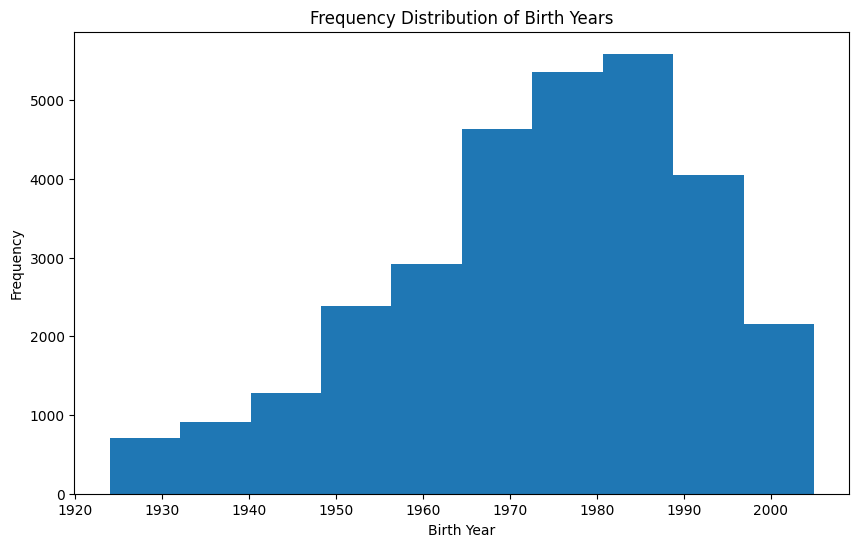

In [36]:
# check that dob makes sense: year is not overly old or recent
min_dob_year_test = X_test['dob_year'].min()
max_dob_year_test = X_test['dob_year'].max()
print('Oldest birth year in test set:', min_dob_year_test)
print('Latest birth year in test set:', max_dob_year_test)

plt.figure(figsize=(10, 6))
plt.hist(X_test['dob_year'])
plt.title('Frequency Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

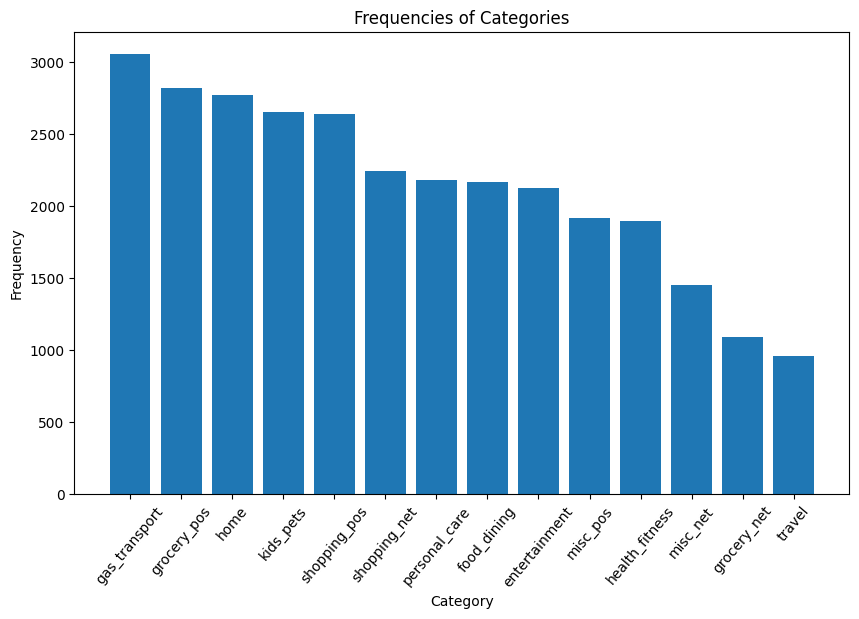

In [37]:
# barplot for category
cat_counts_test = X_test['category'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(list(cat_counts_test.index), cat_counts_test.values)
plt.title('Frequencies of Categories')
plt.xlabel('Category')
plt.xticks(rotation=50)
plt.ylabel('Frequency')
plt.show()

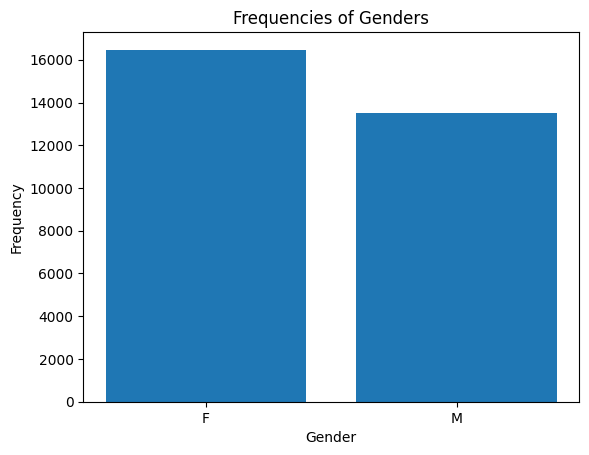

In [38]:
# barplot for gender
gender_counts_test = X_test['gender'].value_counts()

plt.figure()
plt.bar(list(gender_counts_test.index), gender_counts_test.values)
plt.title('Frequencies of Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

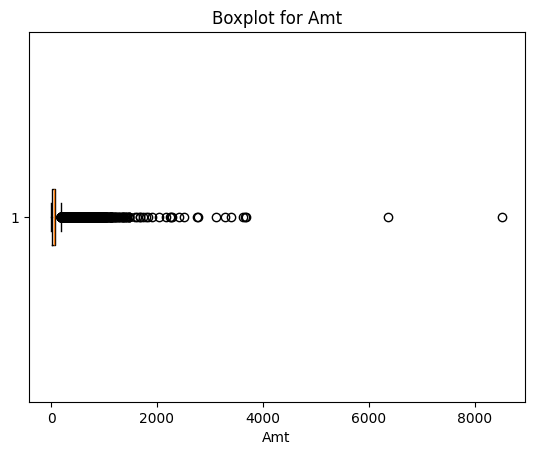

In [39]:
# boxplot for amt
plt.figure()
plt.boxplot(X_test['amt'], vert=False)
plt.title('Boxplot for Amt')
plt.xlabel('Amt')
plt.show()

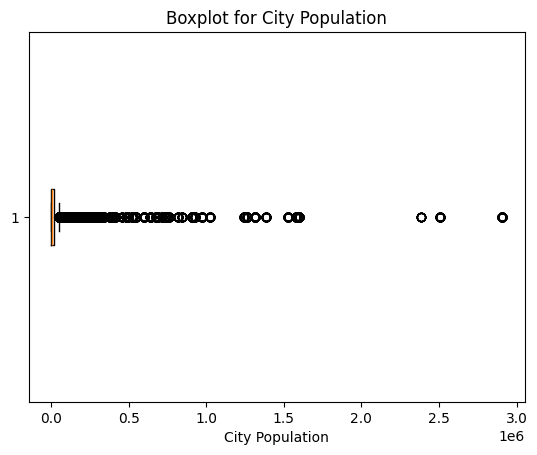

In [40]:
# boxplot for city_pop
plt.figure()
plt.boxplot(X_test['city_pop'], vert=False)
plt.title('Boxplot for City Population')
plt.xlabel('City Population')
plt.show()

In [41]:
# check that lat, merch_lat are between -90 and 90 inclusive
# check that long, merch_long are between -180 and 180 inclusive
print('Number of incorrect lat in test set:', len(X_test[(X_test['lat'] < -90) | (X_test['lat'] > 90)]))
print('Number of incorrect long in test set:', len(X_test[(X_test['long'] < -180) | (X_test['long'] > 180)]))
print('Number of incorrect merch_lat in test set:', len(X_test[(X_test['merch_lat'] < -90) | (X_test['merch_lat'] > 90)]))
print('Number of incorrect merch_long in test set:', len(X_test[(X_test['merch_long'] < -180) | (X_test['merch_long'] > 180)]))

Number of incorrect lat in test set: 0
Number of incorrect long in test set: 0
Number of incorrect merch_lat in test set: 0
Number of incorrect merch_long in test set: 0


From the outlier analysis above, we have decided not to remove any data as outliers from the test set. However, an issue was found with the `trans_date_trans_time` and `unix_time` columns. When converting each value of `trans_date_trans_time` to its corresponding Unix timestamp, the derived Unix timestamp does not match the existing `unix_time` values.

Further investigation is needed, and we may need to remove the `unix_time` feature if this mismatch cannot be resolved.

## Breaking Down Datetime Columns
In this section, we will break down the trans_date_trans_time column into 6 columns for the transaction year, month, day, hour, minute, and second<br>
- These features are more suitable for machine learning models, as they are numerical and easier for the model to process. In contrast, the `trans_date_trans_time` column is of a datetime type, which is less efficient for model learning and could lead to overfitting.
 
NOTE: The `dob` column is already broken down in the outlier analysis section above

## Removing Unnecessary Features
In this section, we will remove certain variables from the train, validation, and test sets. These variables are removed as they either overlap with other features or are not meaningful features and can lead to model overfitting.<br> 
Variables to remove: 'Unnamed: 0', street, zip, trans_num, first, last

#### Train set

In [42]:
X_train = X_train.drop(columns=['Unnamed: 0', 'street', 'zip', 'trans_num', 'first', 'last'])

#### Validation set

In [43]:
X_valid = X_valid.drop(columns=['Unnamed: 0', 'street', 'zip', 'trans_num', 'first', 'last'])

#### Test set

In [44]:
X_test = X_test.drop(columns=['Unnamed: 0', 'street', 'zip', 'trans_num', 'first', 'last'])

## Resampling
In this section, we will resample the train set to handle its class imbalance. Specifically, we will do hybrid resampling where we will first oversample then undersample.

In [45]:
# get initial class counts
print('Initial is_fraud class counts')
y_train.value_counts()

Initial is_fraud class counts


is_fraud
0    232668
1      7332
Name: count, dtype: int64

#### Oversampling (RandomOverSampler)

In [46]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42, sampling_strategy=0.5)
X_res_over, y_res_over = ros.fit_resample(X_train, y_train)

In [47]:
print('Oversampled is_fraud class counts')
y_res_over.value_counts()

Oversampled is_fraud class counts


is_fraud
0    232668
1    116334
Name: count, dtype: int64

In [48]:
# from imblearn.over_sampling import SMOTENC

# sm = SMOTENC(categorical_features=['merchant', 'category', 'first', 'last', 'gender', 'city', 'state', 'job', 'trans_num'], random_state=42, sampling_strategy=0.5)
# X_res_smote, y_res_smote = sm.fit_resample(X_train, y_train)

In [49]:
# print('Oversampled is_fraud class counts')
# y_res_smote.value_counts()

#### Undersampling (RandomUnderSampler)

In [50]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, sampling_strategy=1)
X_res_under, y_res_under = rus.fit_resample(X_res_over, y_res_over)

In [51]:
print('Undersampled is_fraud class counts')
y_res_under.value_counts()

Undersampled is_fraud class counts


is_fraud
0    116334
1    116334
Name: count, dtype: int64

In [52]:
# from imblearn.under_sampling import NearMiss

# nm = NearMiss(sampling_strategy=1)
# X_res_nm, y_res_nm = nm.fit_resample(X_res_over, y_res_over)

In [53]:
# print('Undersampled is_fraud class counts')
# y_res_nm.value_counts()

#### Reset index for resampled X and y

In [54]:
X_train = X_res_under.reset_index(drop=True)
y_train = y_res_under.reset_index(drop=True)

## Feature Engineering

### Features to engineer
- `trans_date_trans_time`
    - break each value up into year, month, day, hour, min, sec columns (completed above)
    - seasonality and holiday indicators
- `dob`
    - break each value up into year, month, day columns (completed above)
    - create age column: calculate it from current datetime (by year)
- `lat`, `long`, `merch_lat`, `merch_long`
    - create geohash column: use python-geohash package to generate geohash for each pair of latitude and longitude
    - create x, y, z columns: x = cos(lat) * cos(long), y = cos(lat) * sin(long), z = sin(lat) 
    - clustering: k-means, DBSCAN, hierarchical clustering
    - https://fritz.ai/working-with-geospatial-data-in-machine-learning/
    - google places api
- `cc_num`
    - create card_issuing_bank column by categorisation: usually the first few digits of a credit card number are used to identify the issuing bank, we need to check that this rule applies in our dataset as it is synthetic
    - clustering?
    - otherwise, we might have to remove this feature as it may lead to model overfitting
- `job`
    - clustering: brown clustering

### `trans_date_trans_time`, `dob`
- `trans_date_trans_time`: create features for quarter, time of day, day of week, week of year, whether it is weekend or not, whether it is work hours or not
- `dob`: create features for quarter, day of week, week of year, whether it is weekend or not, age

In [55]:
# function to output the time of day given hour input
def convert_hour_to_timeofday(h):
    if h >= 5 and h < 12:
        return 'morning'
    elif h >= 12 and h < 17:
        return 'afternoon'
    elif h >= 17 and h < 21:
        return 'evening'
    else:
        return 'night'

In [56]:
# function to extract datetime features from df
def get_datetime_features(df):
    df_new = df.copy()

    df_new['trans_year'] = df_new['trans_date_trans_time'].dt.year
    df_new['trans_month'] = df_new['trans_date_trans_time'].dt.month
    df_new['trans_day'] = df_new['trans_date_trans_time'].dt.day
    df_new['trans_hour'] = df_new['trans_date_trans_time'].dt.hour
    df_new['trans_min'] = df_new['trans_date_trans_time'].dt.minute
    df_new['trans_sec'] = df_new['trans_date_trans_time'].dt.second

    # for trans_date_trans_time: create features for quarter, time of day, day of week, week of year, whether it is weekend or not, whether it is work hours or not
    # for dob: create features for quarter, day of week, week of year, whether it is weekend or not
    for d in ['trans_date_trans_time', 'dob']:
        colname_prefix = 'trans'
        if d == 'dob':
            colname_prefix = 'dob'

        df_new[f'{colname_prefix}_quarter'] = df_new[d].dt.quarter
        df_new[f'{colname_prefix}_dayofweek'] = df_new[d].dt.day_name()
        df_new[f'{colname_prefix}_weekofyear'] = df_new[d].apply(lambda x: x.isocalendar().week)
        df_new[f'{colname_prefix}_isweekend'] = np.where(df_new[f'{colname_prefix}_dayofweek'].isin(['Saturday', 'Sunday']),1,0)

        if d == 'trans_date_trans_time':
            df_new[f'{colname_prefix}_timeofday'] = df_new[d].dt.hour.apply(convert_hour_to_timeofday)
            df_new[f'{colname_prefix}_isworkhours'] = np.where(df_new[d].dt.hour.isin([19,20,21,22,23,24,0,1,2,3,4,5,6,7]),0,1)

    # from dob: calculate age as of 2024 and create column
    df_new['age'] = 2024 - df_new['dob_year']

    # remove original trans_date_trans_time and dob columns
    df_new = df_new.drop(columns=['trans_date_trans_time', 'dob'])

    return df_new

X_train = get_datetime_features(X_train)
X_valid = get_datetime_features(X_valid)
X_test = get_datetime_features(X_test)

In [57]:
X_train

,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,...,trans_dayofweek,trans_weekofyear,trans_isweekend,trans_timeofday,trans_isworkhours,dob_quarter,dob_dayofweek,dob_weekofyear,dob_isweekend,age
0,4861310130652566408,fraud_Auer-West,shopping_net,1.17,F,Saint Amant,LA,30.2385,-90.8435,10076,...,Monday,8,0,night,0,4,Friday,50,0,47
1,3501509250702469,"fraud_Ruecker, Beer and Collier",shopping_net,8.65,M,Naples,FL,26.1184,-81.7361,276002,...,Friday,32,0,afternoon,1,1,Tuesday,1,0,45
2,3506042666828517,fraud_Hilpert-Conroy,kids_pets,10.50,F,Comfort,WV,38.1372,-81.5962,630,...,Wednesday,23,0,afternoon,1,3,Thursday,31,0,65
3,5388659976630693,"fraud_Stroman, Hudson and Erdman",gas_transport,81.59,M,Seneca,WI,43.2064,-90.9405,153,...,Wednesday,45,0,morning,1,1,Wednesday,7,0,62
4,180048185037117,fraud_Murray-Smitham,grocery_pos,211.87,F,Plainfield,NJ,40.6152,-74.4150,71485,...,Sunday,32,1,morning,1,3,Friday,29,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232663,30501624614310,fraud_Shields Inc,grocery_net,6.68,F,Scotia,SC,32.6786,-81.2455,302,...,Friday,10,0,night,0,2,Friday,18,0,51
232664,676308307625,fraud_Kris-Weimann,misc_net,850.18,M,Washoe Valley,NV,39.2669,-119.8174,4290,...,Sunday,35,1,night,0,4,Sunday,49,1,35
232665,4855488158131690372,fraud_Vandervort-Funk,grocery_pos,286.51,M,Graniteville,VT,44.1554,-72.4847,970,...,Thursday,11,0,evening,1,3,Wednesday,39,0,31
232666,3541554378551366,fraud_Medhurst PLC,shopping_net,1134.36,F,Hampton,VA,37.0462,-76.4096,136895,...,Saturday,3,1,night,0,3,Tuesday,38,0,85


### `lat`, `long`, `merch_lat`, `merch_long`

In this section, we explore the spatial relationships between the credit card holder's location and the merchant's location by leveraging clustering and creating new features.

- Clustering:
  - Experimented with K-Means and DBSCAN clustering algorithms. 
  - Hierarchical clustering was excluded due to its computational inefficiency with large datasets.
  - The next step involves deciding whether to use K-Means or DBSCAN for clustering and then encoding and scaling the resulting features (distance).

- Create New Features:
  - Distance Between Merchant and Credit Card Holder
    - Geographic distance between the merchant's and the card holder's location based on their respective latitudes and longitudes.
  - Cartesian Coordinates (x, y, z)
    - create new features by converting the latitude/longitude and merchant latitude/longitude into Cartesian coordinates (x, y, z)

#### K-Means Clustering

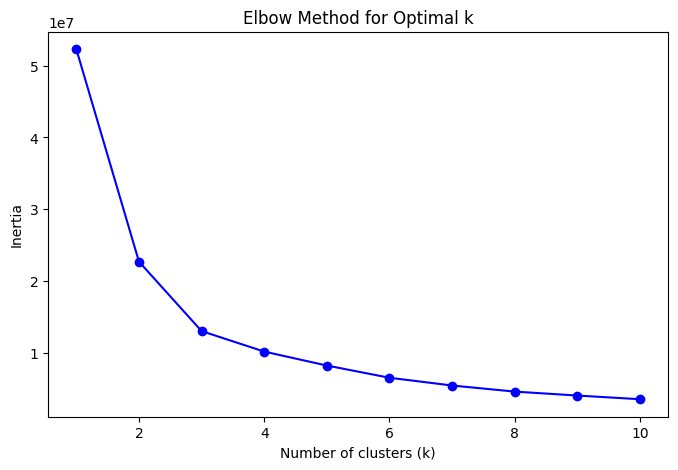

In [58]:
# using elbow method to find optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def plot_elbow_method(data, max_k=10, lat_col='lat', long_col='long'):
    inertia = []
    K = range(1, max_k + 1)
    
    # compute KMeans for each number of clusters and record inertia
    for k in K:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(data[[lat_col, long_col]])
        inertia.append(kmeans.inertia_)
    
    # plot the Elbow Curve
    plt.figure(figsize=(8, 5))
    plt.plot(K, inertia, 'bo-')
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Inertia")
    plt.title("Elbow Method for Optimal k")
    plt.show()

# apply on X_train
plot_elbow_method(X_train)

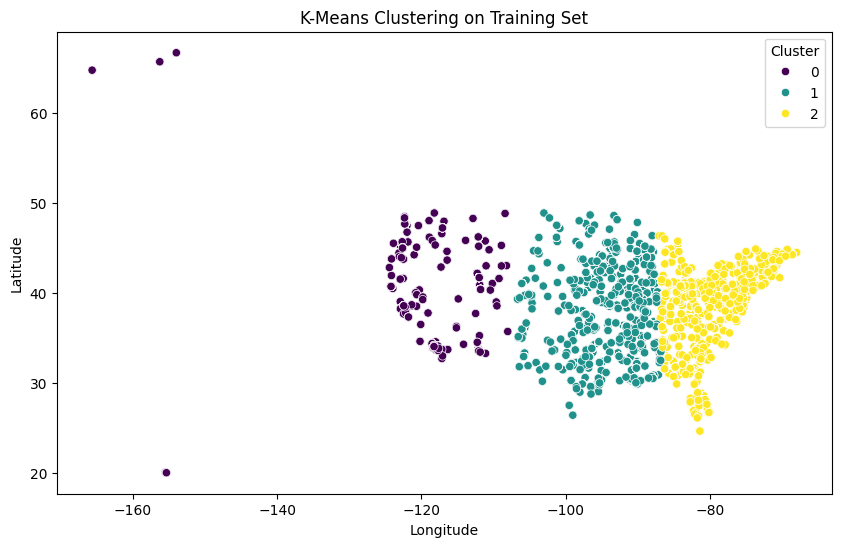

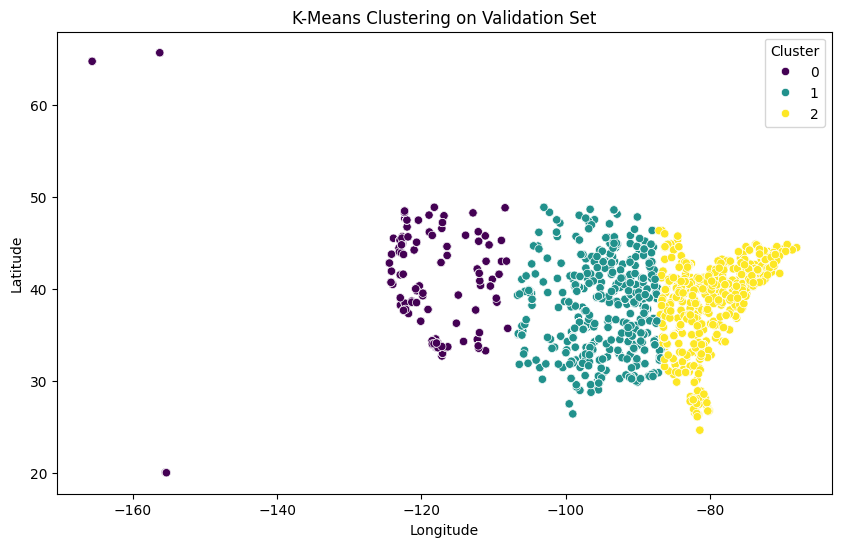

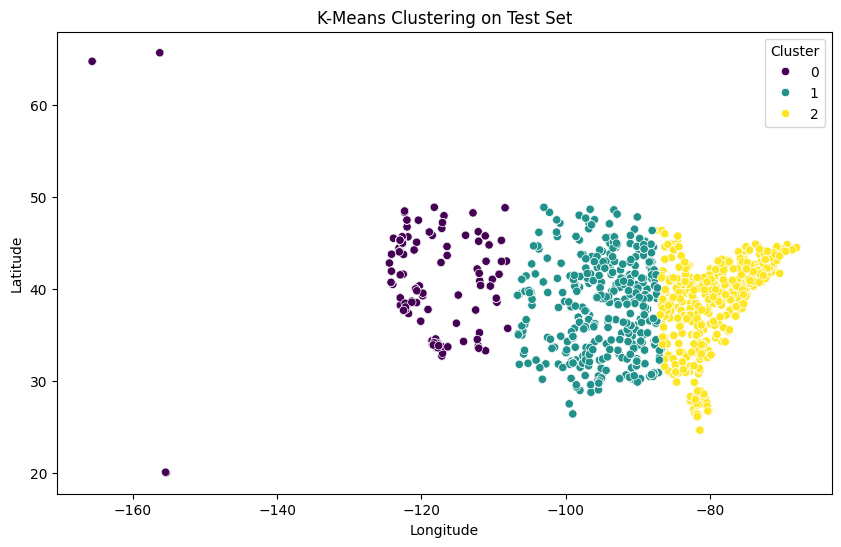

In [59]:
# k-means clustering
from sklearn.cluster import KMeans
import seaborn as sns

# fit KMeans on the training data
n_clusters = 3 # based on elbow plot
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train[['lat', 'long']])  # only fit on X_train

# assign clusters to each set (train, valid, and test)
X_train['kmeans_cluster_loc'] = kmeans.predict(X_train[['lat', 'long']])
X_valid['kmeans_cluster_loc'] = kmeans.predict(X_valid[['lat', 'long']])
X_test['kmeans_cluster_loc'] = kmeans.predict(X_test[['lat', 'long']])

# visualize clusters for each dataset
def plot_clusters(data, lat_col='lat', long_col='long', title="Cluster Plot"):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=long_col, y=lat_col, hue='kmeans_cluster_loc', data=data, palette="viridis")
    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend(title="Cluster")
    plt.show()

plot_clusters(X_train, title="K-Means Clustering on Training Set")
plot_clusters(X_valid, title="K-Means Clustering on Validation Set")
plot_clusters(X_test, title="K-Means Clustering on Test Set")

In [60]:
# check number of datapoints per cluster in each dataset
print("Cluster counts in X_train:")
print(X_train['kmeans_cluster_loc'].value_counts())

print("\nCluster counts in X_valid:")
print(X_valid['kmeans_cluster_loc'].value_counts())

print("\nCluster counts in X_test:")
print(X_test['kmeans_cluster_loc'].value_counts())

Cluster counts in X_train:
kmeans_cluster_loc
2    115106
1     89395
0     28167
Name: count, dtype: int64

Cluster counts in X_valid:
kmeans_cluster_loc
2    14541
1    11796
0     3663
Name: count, dtype: int64

Cluster counts in X_test:
kmeans_cluster_loc
2    14578
1    11818
0     3604
Name: count, dtype: int64


#### DBSCAN Clustering (more for large datasets, cluster based on density)

In [61]:
# from sklearn.neighbors import NearestNeighbors
# import numpy as np
# import matplotlib.pyplot as plt

# # convert lat/long to radians
# coords_rad = np.radians(X_valid[['lat', 'long']])

# # fit K-Nearest Neighbors with k=min_samples
# min_samples = 10
# neighbors = NearestNeighbors(n_neighbors=min_samples, metric='haversine')
# neighbors_fit = neighbors.fit(coords_rad)
# distances, indices = neighbors_fit.kneighbors(coords_rad)

# # sort distances for each point to its kth nearest neighbor
# distances = np.sort(distances[:, min_samples-1])
# plt.figure(figsize=(8, 5))
# plt.plot(distances)
# plt.ylabel("Distance to {}-th Nearest Neighbor (radians)".format(min_samples))
# plt.xlabel("Points sorted by distance")
# plt.title("K-Nearest Neighbors Distance Plot")
# plt.show()

In [62]:
# from sklearn.cluster import DBSCAN
# import matplotlib.pyplot as plt
# import seaborn as sns

# # define the DBSCAN model
# chosen_eps = 0.015  #from KNN distance plot
# min_samples = 10
# dbscan = DBSCAN(eps=chosen_eps, min_samples=min_samples, algorithm='ball_tree', metric='haversine')

# # convert lat/long to radians
# coords_train_rad = np.radians(X_train[['lat', 'long']])
# coords_valid_rad = np.radians(X_valid[['lat', 'long']])
# coords_test_rad = np.radians(X_test[['lat', 'long']])

# # fit DBSCAN on X_train
# X_train['dbscan_cluster_loc'] = dbscan.fit_predict(coords_train_rad)

# # use the same model to predict clusters for X_valid and X_test
# X_valid['dbscan_cluster_loc'] = dbscan.fit_predict(coords_valid_rad)
# X_test['dbscan_cluster_loc'] = dbscan.fit_predict(coords_test_rad)

# # visualize clusters for each dataset
# def plot_clusters(data, lat_col='lat', long_col='long', title="Cluster Plot"):
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(x=long_col, y=lat_col, hue='dbscan_cluster_loc', data=data, palette="viridis")
#     plt.title(title)
#     plt.xlabel("Longitude")
#     plt.ylabel("Latitude")
#     plt.legend(title="Cluster")
#     plt.show()

# plot_clusters(X_train, title="DBSCAN Clustering on Training Set")
# plot_clusters(X_valid, title="DBSCAN Clustering on Validation Set")
# plot_clusters(X_test, title="DBSCAN Clustering on Test Set")

In [63]:
# # check number of datapoints per cluster in each dataset
# print("Cluster counts in Training Set:")
# print(X_train['dbscan_cluster_loc'].value_counts())

# print("\nCluster counts in Validation Set:")
# print(X_valid['dbscan_cluster_loc'].value_counts())

# print("\nCluster counts in Test Set:")
# print(X_test['dbscan_cluster_loc'].value_counts())

#### Cartesian Coordinates (x, y, z)

In [64]:
# calculate cartesian coordinates of merchant and credit card holder's location
def add_cartesian_coordinates(df):
    # merchant coordinates
    df['merch_x'] = np.cos(df['merch_lat']) * np.cos(df['merch_long'])
    df['merch_y'] = np.cos(df['merch_lat']) * np.sin(df['merch_long'])
    df['merch_z'] = np.sin(df['merch_lat'])
    
    # credit card holder coordinates
    df['holder_x'] = np.cos(df['lat']) * np.cos(df['long'])
    df['holder_y'] = np.cos(df['lat']) * np.sin(df['long'])
    df['holder_z'] = np.sin(df['lat'])

    return df

X_train = add_cartesian_coordinates(X_train)
X_valid = add_cartesian_coordinates(X_valid)
X_test = add_cartesian_coordinates(X_test)

#### Haversine Distance between merchant and credit card holder

In [65]:
# Haversine function for vectorized distance calculation
def haversine_vectorized(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees) using the Haversine formula.
    Returns distance in kilometers.
    """
    R = 6371  # Earth radius in kilometers

    lat1_rad = np.radians(lat1)
    lat2_rad = np.radians(lat2)
    delta_lat = lat2_rad - lat1_rad
    delta_lon = np.radians(lon2 - lon1)

    a = np.sin(delta_lat / 2.0)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(delta_lon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))

    distance = R * c
    return distance

X_train['merch_holder_dist'] = haversine_vectorized(X_train['lat'], X_train['long'], X_train['merch_lat'], X_train['merch_long']).fillna(0)
X_valid['merch_holder_dist'] = haversine_vectorized(X_valid['lat'], X_valid['long'], X_valid['merch_lat'], X_valid['merch_long']).fillna(0)
X_test['merch_holder_dist'] = haversine_vectorized(X_test['lat'], X_test['long'], X_test['merch_lat'], X_test['merch_long']).fillna(0)

### `cc_num` and Relationship with Transactions

- Features obtained by extracting information from `cc_num`
    - Validity of number - Luhn algorithm
    - Card issuer
    - Major Industry Identifier (MII)
    - Card level

- Features obtained by grouping consecutive transactions from the same `cc_num`
    - Time since last transaction
    - Haversine Distance since last transaction
    - Transaction Velocity

These features are designed to offer insights into the usage patterns and potential risks associated with each card and its transactions.

#### Obtaining features by extracting information from `cc_num`

In [66]:
# Bank Identification Number (BIN) Ranges
BIN_RANGES = [
    ("4", "4", "Visa"),
    ("51", "55", "MasterCard"),
    ("2221", "2720", "MasterCard"),
    ("34", "34", "American Express"),
    ("37", "37", "American Express"),
    ("6011", "6011", "Discover"),
    ("65", "65", "Discover"),
    ("644", "649", "Discover"),
    ("622126", "622925", "Discover"),
    ("3528", "3589", "JCB"),
    ("36", "36", "Diners Club"),
    ("38", "38", "Diners Club"),
]

# Major Industry Identifier (MII)
mii_map = {
    '0': "ISO/TC 68 and other industry assignments",
    '1': "Airlines",
    '2': "Airlines and Other Transportation and Related Services",
    '3': "Travel and Entertainment",
    '4': "Banking and Financial",
    '5': "Banking and Financial",
    '6': "Merchandising and Banking",
    '7': "Petroleum",
    '8': "Telecommunications",
    '9': "National Assignment",
}

def get_issuer(card_number):
    for start, end, issuer in BIN_RANGES:
        prefix_length = len(start)
        card_prefix = card_number[:prefix_length]
        if start <= card_prefix <= end:
            return issuer
    return "Unknown"

def extract_card_info(card_number):
    """
    Extract useful information from a credit card number.
    :param card_number: str - The credit card number to analyze
    :return: dict - Dictionary containing various pieces of information
    """
    card_info = {}
    
    # Step 1: Ensure input is a string and remove non-digit characters
    card_number = ''.join(filter(str.isdigit, str(card_number).strip()))
    
    # Step 2: Validate the card number length
    length = len(card_number)
    # card_info['length'] = length
    
    # Step 3: Identify the card issuer
    issuer = get_issuer(card_number)
    card_info['issuer'] = issuer
    
    # Step 4: Validate using Luhn algorithm

    def luhn_algorithm(card_num):
        """
        Algorithm involves splitting numbers by whether they are at odd or even indexes
        """
        digits = [int(d) for d in card_num]
        checksum = 0
        parity = len(digits) % 2
        for i, digit in enumerate(digits):
            if i % 2 == parity:
                digit *= 2
                if digit > 9:
                    digit -= 9
            checksum += digit
        return checksum % 10 == 0
    
    card_info['luhn_valid'] = luhn_algorithm(card_number)
    
    # Step 5: Major Industry Identifier (MII)
    mii = mii_map.get(card_number[0], "Unknown Industry")
    card_info['mii'] = mii
    
    # Step 6: Card Level (if applicable, for AMEX or others)
    card_info['card_level'] = "Standard"  # Default value
    if issuer == "American Express" and length == 15:
        card_info['card_level'] = "Gold or Platinum"
    
    # Step 7: Validate Length (as a preliminary check)
    # valid_length = {
    #     "Visa": [13, 16, 19],
    #     "MasterCard": [16],
    #     "American Express": [15],
    #     "Discover": [16, 19],
    #     "JCB": [15, 16],
    #     "Diners Club": [14],  # Diners Club typically has 14 digits
    # }
    # if issuer in valid_length:
    #     card_info['length_valid'] = length in valid_length[issuer]
    # else:
    #     card_info['length_valid'] = False
    
    return card_info

# Function to add information to Dataframe
def analyze_credit_cards(df, column='cc_num'):
    """
    Analyze credit card numbers in a DataFrame and extract useful information,
    adding the results directly to the DataFrame.
    :param df: DataFrame containing credit card numbers
    :param column: str - Name of the column containing credit card numbers
    :return: DataFrame with extracted card information
    """
    # Apply the extract_card_info function to each card number
    results = df[column].apply(extract_card_info).tolist()
    
    # Convert results to DataFrame
    df_results = pd.DataFrame(results)
    
    # Concatenate the results with the original DataFrame
    df_combined = pd.concat([df, df_results], axis=1)
    
    return df_combined

X_train = analyze_credit_cards(X_train)
X_valid = analyze_credit_cards(X_valid)
X_test = analyze_credit_cards(X_test)

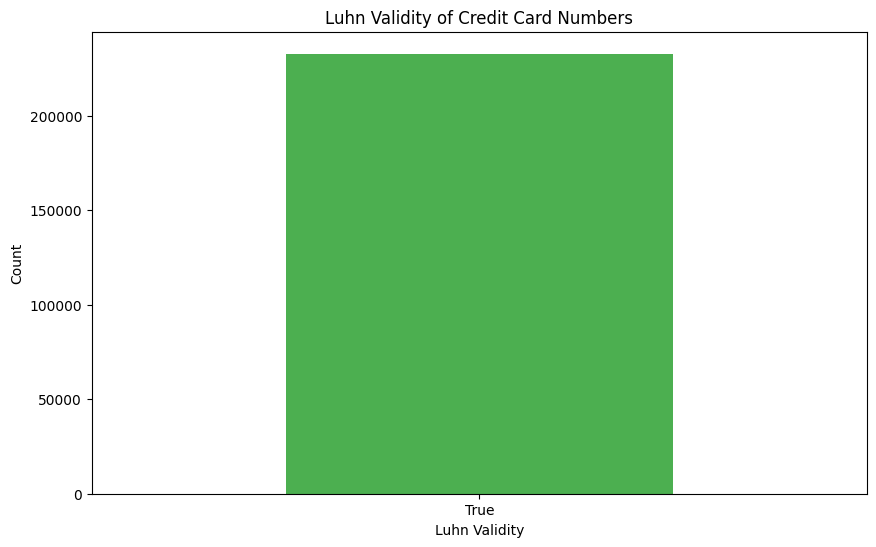

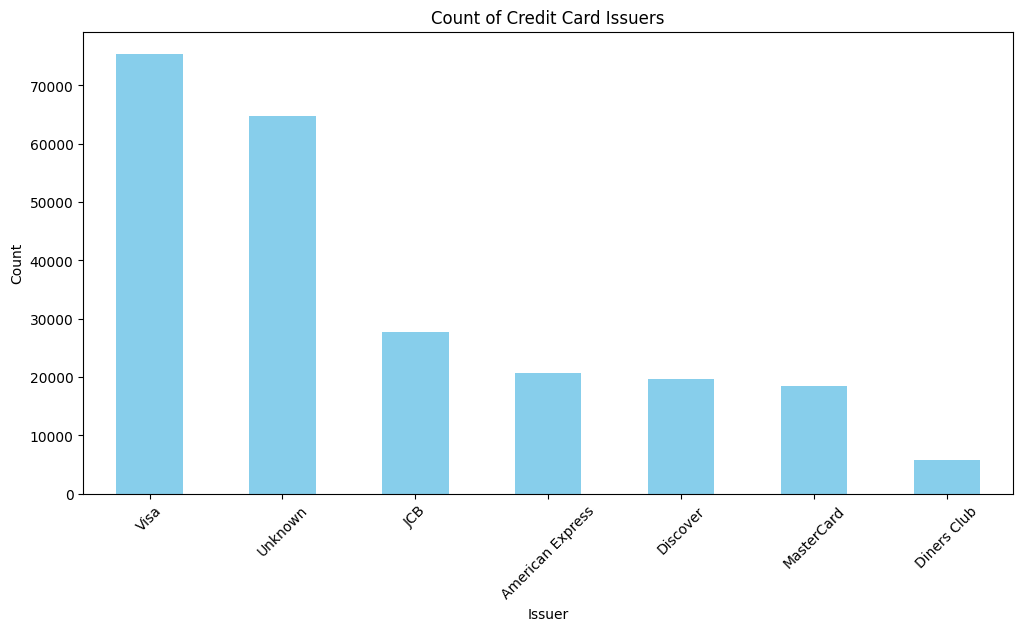

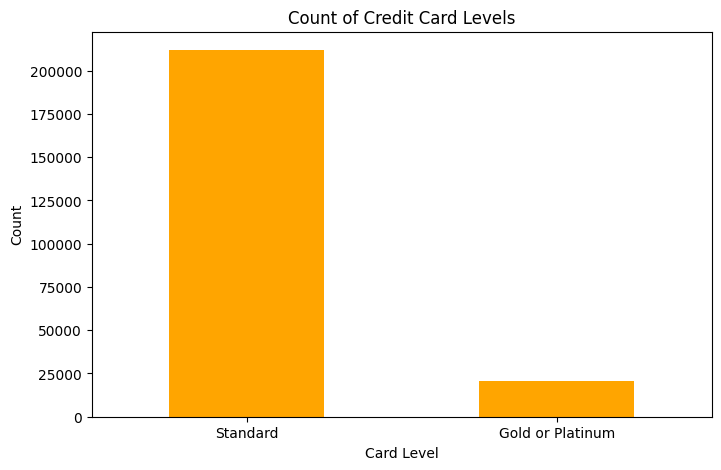

In [67]:
# Visualising distribution of extracted credit card details for Train
plt.style.use('default')

# Luhn Validity Plot
plt.figure(figsize=(10, 6))
length_valid_counts = X_train['luhn_valid'].value_counts()
length_valid_counts.plot(kind='bar', color=['#4CAF50', '#FF5733'])
plt.title('Luhn Validity of Credit Card Numbers')
plt.xlabel('Luhn Validity')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


# Issuer Counts Plot
plt.figure(figsize=(12, 6))
issuer_counts = X_train['issuer'].value_counts()
issuer_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Credit Card Issuers')
plt.xlabel('Issuer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Card Level Counts Plot
plt.figure(figsize=(8, 5))
card_level_counts = X_train['card_level'].value_counts()
card_level_counts.plot(kind='bar', color='orange')
plt.title('Count of Credit Card Levels')
plt.xlabel('Card Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### Obtaining features based on consecutive transactions by the same `cc_num`

In [68]:
# from tqdm import tqdm

# Optional: Initialize tqdm for pandas
# tqdm.pandas()

# Function to perform feature engineering
def add_transaction_features(df):
    """
    Adds time difference, distance, and velocity features between consecutive transactions.
    Preserves the original order of the DataFrame.
    
    :param df: pandas DataFrame with columns ['cc_num', 'unix_time', 'merch_lat', 'merch_long']
    :return: pandas DataFrame with new features added
    """
    # Ensure DataFrame is sorted by 'cc_num' and 'unix_time' before processing
    df_sorted = df.sort_values(by=['cc_num', 'unix_time']).copy()

    # Add an index column to preserve original order
    df_sorted['original_order'] = df_sorted.index

    # Calculate the time since the last transaction
    df_sorted['time_since_last_trans'] = (
        df_sorted.groupby('cc_num')['unix_time']
        .transform(lambda x: x.diff().fillna(0))
    )

    # Shift the merchant coordinates to get previous transaction's merchant location
    df_sorted['prev_merch_lat'] = df_sorted.groupby('cc_num')['merch_lat'].shift(1)
    df_sorted['prev_merch_long'] = df_sorted.groupby('cc_num')['merch_long'].shift(1)

    # Calculate the distance between previous and current merchant locations using Haversine formula
    df_sorted['dist_from_last_trans'] = haversine_vectorized(
        df_sorted['prev_merch_lat'],
        df_sorted['prev_merch_long'],
        df_sorted['merch_lat'],
        df_sorted['merch_long']
    ).fillna(0)  # Fill NaN with 0 for the first transaction

    # Calculate transaction velocity (km/h)
    df_sorted['transaction_velocity'] = np.where(
        df_sorted['time_since_last_trans'] > 0,
        df_sorted['dist_from_last_trans'] / (df_sorted['time_since_last_trans'] / 3600),  # km/h
        0  # Velocity is 0 if time difference is 0
    )

    # Optionally, handle infinite velocities resulting from zero time differences
    df_sorted['transaction_velocity'].replace([np.inf, -np.inf], np.nan, inplace=True)

    # Sort the DataFrame back to its original order using the 'original_order' column
    df_final = df_sorted.sort_values(by='original_order').copy()

    # Drop the auxiliary columns used for calculation
    df_final.drop(columns=['original_order', 'prev_merch_lat', 'prev_merch_long'], inplace=True)

    # Reset index if necessary
    df_final.reset_index(drop=True, inplace=True)

    return df_final

X_train = add_transaction_features(X_train)
X_valid = add_transaction_features(X_valid)
X_test = add_transaction_features(X_test)

In [69]:
pd.set_option('display.max_columns', None)
X_train

,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,dob_year,dob_month,dob_day,trans_year,trans_month,trans_day,trans_hour,trans_min,trans_sec,trans_quarter,trans_dayofweek,trans_weekofyear,trans_isweekend,trans_timeofday,trans_isworkhours,dob_quarter,dob_dayofweek,dob_weekofyear,dob_isweekend,age,kmeans_cluster_loc,merch_x,merch_y,merch_z,holder_x,holder_y,holder_z,merch_holder_dist,issuer,luhn_valid,mii,card_level,time_since_last_trans,dist_from_last_trans,transaction_velocity
0,4861310130652566408,fraud_Auer-West,shopping_net,1.17,F,Saint Amant,LA,30.2385,-90.8435,10076,"Surveyor, rural practice",1361145004,29.973209,-90.617086,1977,12,16,2020,2,17,23,50,4,1,Monday,8,0,night,0,4,Friday,50,0,47,1,-0.112753,-0.060011,-0.991809,-0.370154,-0.099535,-0.923623,36.668123,Visa,True,Banking and Financial,Standard,41131.0,58.520431,5.122014
1,3501509250702469,"fraud_Ruecker, Beer and Collier",shopping_net,8.65,M,Naples,FL,26.1184,-81.7361,276002,"Programme researcher, broadcasting/film/video",1344526115,25.887077,-81.564535,1979,1,2,2019,8,9,15,28,35,3,Friday,32,0,afternoon,1,1,Tuesday,1,0,45,2,0.723755,0.084975,0.684805,0.551488,-0.030192,0.833636,30.912849,Unknown,True,Travel and Entertainment,Standard,145981.0,157.863973,3.893043
2,3506042666828517,fraud_Hilpert-Conroy,kids_pets,10.50,F,Comfort,WV,38.1372,-81.5962,630,Fine artist,1338912205,37.146606,-81.619032,1959,7,30,2019,6,5,16,3,25,2,Wednesday,23,0,afternoon,1,3,Thursday,31,0,65,2,0.849557,0.053062,-0.524822,0.902279,0.077069,0.424209,110.167370,Unknown,True,Travel and Entertainment,Standard,235373.0,145.535748,2.225951
3,5388659976630693,"fraud_Stroman, Hudson and Erdman",gas_transport,81.59,M,Seneca,WI,43.2064,-90.9405,153,Quantity surveyor,1352199079,42.358517,-91.763561,1962,2,14,2019,11,6,10,51,19,4,Wednesday,45,0,morning,1,1,Wednesday,7,0,62,1,0.041922,-0.032360,-0.998597,-0.704018,-0.117726,-0.700357,115.759541,MasterCard,True,Banking and Financial,Standard,781481.0,65.893971,0.303550
4,180048185037117,fraud_Murray-Smitham,grocery_pos,211.87,F,Plainfield,NJ,40.6152,-74.4150,71485,Leisure centre manager,1344673103,40.055180,-74.132404,1974,7,19,2019,8,11,8,18,23,3,Sunday,32,1,morning,1,3,Friday,29,0,50,2,-0.212297,-0.674391,0.707196,-0.540307,-0.811216,0.223598,66.719244,Unknown,True,Airlines,Standard,37793.0,182.701433,17.403359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232663,30501624614310,fraud_Shields Inc,grocery_net,6.68,F,Scotia,SC,32.6786,-81.2455,302,Magazine features editor,1331177701,33.062076,-81.743136,1973,5,4,2019,3,8,3,35,1,1,Friday,10,0,night,0,2,Friday,18,0,51,2,-0.075138,0.004644,0.997162,0.274911,0.128051,0.952905,63.072792,Unknown,True,Travel and Entertainment,Standard,0.0,0.000000,0.000000
232664,676308307625,fraud_Kris-Weimann,misc_net,850.18,M,Washoe Valley,NV,39.2669,-119.8174,4290,Animal nutritionist,1346469135,39.726418,-118.927284,1989,12,10,2019,9,1,3,12,15,3,Sunday,35,1,night,0,4,Sunday,49,1,35,0,-0.396311,-0.193024,0.897596,0.002726,-0.001273,0.999995,91.891253,Unknown,True,Merchandising and Banking,Standard,0.0,0.000000,0.000000
232665,4855488158131690372,fraud_Vandervort-Funk,grocery_pos,286.51,M,Graniteville,VT,44.1554,-72.4847,970,Agricultural consultant,1363112501,44.546807,-73.339106,1993,9,29,2020,3,12,18,21,41,1,Thursday,11,0,evening,1,3,Wednesday,39,0,31,2,-0.396357,0.746106,0.535002,-0.959547,0.222718,0.172240,80.680497,Visa,True,Banking and Financial,Standard,0.0,0.000000,0.000000
232666,3541554378551366,fraud_Medhurst PLC,shopping_net,1134.36,F,Hampton,VA,37.0462,-76.4096,136895,Accounting technician,1327017460,36.128777,-76.974768,1939,9,19,2019,1,19,23,57,40,1,Saturday,3,1,night,0,3,Tuesday,38,0,85,2,-0.000003,-0.000461,-1.000000,0.421540,-0.673235,-0.607502,113.809918,JCB,True,Travel and Entertainment,Standard,0.0,0.0000

### `job` 

- Features obtained by extracting information from job
    - Numerical representation of job titles using TF-IDF vectorization.
    - Clusters of similar job roles, created using MiniBatchKMeans for efficiency on large datasets.
    - Optimal number of clusters determined by the silhouette score, measuring cluster separation.

- Features obtained by clustering job titles
    - Cluster labels for job roles, indicating similarity in responsibilities.
    - Distinctive groupings of job titles for downstream modeling tasks.

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

# convert all to lowercase and remove punctuation
for df in [X_train, X_valid, X_test]:
    df['job'] = df['job'].str.lower()
    df['job'] = df['job'].str.replace('[^\w\s]', '', regex=True)

# fit TF-IDF on datasets    
tfidf_vectorizer = TfidfVectorizer()
X_train_fe = tfidf_vectorizer.fit_transform(X_train['job'])
X_valid_fe = tfidf_vectorizer.transform(X_valid['job'])
X_test_fe = tfidf_vectorizer.transform(X_test['job'])

In [71]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
from tqdm import tqdm  # import to see progress bar

# calculation of silhouette scores
silhouette_scores = []
K = range(2, 6)

for k in tqdm(K, desc="Calculating silhouette scores"):  
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_fe)
    score = silhouette_score(X_train_fe, kmeans.labels_)
    silhouette_scores.append(score)
    
# get optimal k
optimal_k = K[silhouette_scores.index(max(silhouette_scores))]

Calculating silhouette scores: 100%|██████████| 4/4 [49:10<00:00, 737.66s/it]


In [72]:
# fit kmeans with optimal k
kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42)

X_train['job_cluster'] = kmeans.fit_predict(X_train_fe)
X_valid['job_cluster'] = kmeans.predict(X_valid_fe)
X_test['job_cluster'] = kmeans.predict(X_test_fe)

## Dropping Unnecessary Features
In this section, we identify and remove features from the train, validation, and test sets that are no longer required following feature engineering. Removing these features reduces redundancy, improves efficiency, and simplifies the modeling process.

### Features to Drop

- **`lat`, `long`, `merch_lat`, `merch_long`:**  
  These features are removed as their information has been captured through more representative features such as the Haversine distance between transaction locations.

- **`luhn_valid`:**  
  This feature is not useful for modeling since all values in this column are `True`, providing no variation for the model to leverage.

- **`job`:**  
  The `job` column is dropped after feature engineering, where job titles are converted into numerical representations and clustered into similar groups. The original text data is no longer needed for downstream tasks as it has been replaced by the more meaningful cluster labels.


In [73]:
X_train = X_train.drop(columns=['merch_lat', 'merch_long', 'lat', 'long', 'luhn_valid', 'job'])
X_valid = X_valid.drop(columns=['merch_lat', 'merch_long', 'lat', 'long', 'luhn_valid', 'job'])
X_test = X_test.drop(columns=['merch_lat', 'merch_long', 'lat', 'long', 'luhn_valid', 'job'])

## Scaling
In this section, we will scale certain features in the train, validation, and test sets to ensure that all numerical features are on a comparable scale.

**Features to Scale**

- Original Features:
  - `amt`, `unix_time`, `city_pop`

- Engineered Features:
  - `dob_year`, `dob_month`, `dob_day`, `trans_year`, `trans_month`, `trans_day`, `trans_hour`, `trans_min`, `trans_sec`, `trans_weekofyear`, `dob_weekofyear`, `age`, `merch_x`, `merch_y`, `merch_z`, `holder_x`, `holder_y`, `holder_z`, `merch_holder_dist`, `time_since_last_trans`, `dist_from_last_trans`, `transaction_velocity`

These features will be scaled to ensure that the model model gives equal importance to all numerical variables.


#### Train set

In [74]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_to_scale = ['amt', 'unix_time', 'city_pop', 'dob_year', 'dob_month', 'dob_day', 'trans_year', 'trans_month', 'trans_day', 'trans_hour', 
                     'trans_min', 'trans_sec', 'trans_weekofyear', 'dob_weekofyear', 'age', 'merch_x', 'merch_y', 'merch_z', 'holder_x', 'holder_y', 
                     'holder_z', 'merch_holder_dist', 'time_since_last_trans', 'dist_from_last_trans', 'transaction_velocity']

# filter for numerical features and scale them
scaled_train = X_train[features_to_scale]
scaled_train = scaler.fit_transform(scaled_train)
scaled_train_df = pd.DataFrame(scaled_train, columns=features_to_scale)

In [75]:
# replace columns in X_train with the corresponding scaled columns in scaled_train_df
X_train = X_train.drop(columns=features_to_scale)
X_train = X_train.join(scaled_train_df, how='inner')
X_train

,cc_num,merchant,category,gender,city,state,trans_quarter,trans_dayofweek,trans_isweekend,trans_timeofday,trans_isworkhours,dob_quarter,dob_dayofweek,dob_isweekend,kmeans_cluster_loc,issuer,mii,card_level,job_cluster,amt,unix_time,city_pop,dob_year,dob_month,dob_day,trans_year,trans_month,trans_day,trans_hour,trans_min,trans_sec,trans_weekofyear,dob_weekofyear,age,merch_x,merch_y,merch_z,holder_x,holder_y,holder_z,merch_holder_dist,time_since_last_trans,dist_from_last_trans,transaction_velocity
0,4861310130652566408,fraud_Auer-West,shopping_net,F,Saint Amant,LA,1,Monday,0,night,0,4,Friday,0,1,Visa,Banking and Financial,Standard,4,0.000011,0.770206,0.003459,0.654321,1.000000,0.500000,1.0,0.090909,0.533333,1.000000,0.847458,0.067797,0.137255,0.942308,0.345679,0.443621,0.469989,4.095441e-03,0.315893,0.450140,0.038187,0.246033,0.004717,0.214939,8.558783e-06
1,3501509250702469,"fraud_Ruecker, Beer and Collier",shopping_net,M,Naples,FL,3,Friday,0,afternoon,1,1,Tuesday,0,2,Unknown,Travel and Entertainment,Standard,4,0.000508,0.412355,0.094947,0.679012,0.000000,0.033333,0.0,0.636364,0.266667,0.652174,0.474576,0.593220,0.607843,0.000000,0.320988,0.861884,0.542485,8.424024e-01,0.779001,0.484821,0.916820,0.207297,0.016741,0.579818,6.505197e-06
2,3506042666828517,fraud_Hilpert-Conroy,kids_pets,F,Comfort,WV,2,Wednesday,0,afternoon,1,3,Thursday,0,2,Unknown,Travel and Entertainment,Standard,4,0.000631,0.291471,0.000209,0.432099,0.545455,0.966667,0.0,0.454545,0.133333,0.695652,0.050847,0.423729,0.431373,0.576923,0.567901,0.924786,0.526527,2.375891e-01,0.955266,0.538465,0.712106,0.740720,0.026992,0.534537,3.719519e-06
3,5388659976630693,"fraud_Stroman, Hudson and Erdman",gas_transport,M,Seneca,WI,4,Wednesday,0,morning,1,1,Wednesday,0,1,MasterCard,Banking and Financial,Standard,4,0.005356,0.577575,0.000045,0.469136,0.090909,0.433333,0.0,0.909091,0.166667,0.434783,0.864407,0.322034,0.862745,0.115385,0.530864,0.520961,0.483815,7.016570e-04,0.148132,0.441042,0.149821,0.778358,0.089617,0.242022,5.072255e-07
4,180048185037117,fraud_Murray-Smitham,grocery_pos,F,Plainfield,NJ,3,Sunday,1,morning,1,3,Friday,0,2,Unknown,Airlines,Standard,4,0.014015,0.415520,0.024585,0.617284,0.545455,0.600000,0.0,0.636364,0.333333,0.347826,0.305085,0.389831,0.607843,0.538462,0.382716,0.393849,0.162789,8.535981e-01,0.230394,0.094208,0.611800,0.448292,0.004334,0.671043,2.908067e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232663,30501624614310,fraud_Shields Inc,grocery_net,F,Scotia,SC,1,Friday,0,night,0,2,Friday,0,2,Unknown,Travel and Entertainment,Standard,4,0.000378,0.124926,0.000096,0.604938,0.363636,0.100000,0.0,0.181818,0.233333,0.130435,0.593220,0.016949,0.176471,0.326923,0.395062,0.462429,0.502318,9.985811e-01,0.640026,0.563963,0.976454,0.423750,0.000000,0.000000,0.000000e+00
232664,676308307625,fraud_Kris-Weimann,misc_net,M,Washoe Valley,NV,3,Sunday,1,night,0,4,Sunday,1,0,Unknown,Merchandising and Banking,Standard,4,0.056439,0.454193,0.001468,0.802469,1.000000,0.300000,0.0,0.727273,0.000000,0.130435,0.203390,0.254237,0.666667,0.923077,0.197531,0.301840,0.403480,9.487982e-01,0.503258,0.499284,1.000000,0.617712,0.000000,0.000000,0.000000e+00
232665,4855488158131690372,fraud_Vandervort-Funk,grocery_pos,M,Graniteville,VT,1,Thursday,0,evening,1,3,Wednesday,0,2,Visa,Banking and Financial,Standard,4,0.018976,0.812572,0.000326,0.851852,0.727273,0.933333,1.0,0.181818,0.366667,0.782609,0.355932,0.694915,0.196078,0.730769,0.148148,0.301817,0.873061,7.675009e-01,0.019734,0.611308,0.586121,0.542258,0.000000,0.000000,0.000000e+00
232666,3541554378551366,fraud_Medhurst PLC,shopping_net,F,Hampton,VA,1,Saturday,1,night,0,3,Tuesday,0,2,JCB,Travel and Entertainment,Standard,4,0.075326,0.035344,0.047089,0.185185,0.727273,0.600000,0.0,0.000000,0.600000,1.000000,0.966102,0.677966,0.039216,0.711538,0.814815,0.499998,0.499765,5.300899e-08,0.713704,0.16

#### Validation set

In [76]:
# filter for numerical features and scale them
features_to_scale = ['amt', 'unix_time', 'city_pop', 'dob_year', 'dob_month', 'dob_day', 'trans_year', 'trans_month', 'trans_day', 'trans_hour', 
                     'trans_min', 'trans_sec', 'trans_weekofyear', 'dob_weekofyear', 'age', 'merch_x', 'merch_y', 'merch_z', 'holder_x', 'holder_y', 
                     'holder_z', 'merch_holder_dist', 'time_since_last_trans', 'dist_from_last_trans', 'transaction_velocity']

scaled_valid = X_valid[features_to_scale]
scaled_valid = scaler.transform(scaled_valid)
scaled_valid_df = pd.DataFrame(scaled_valid, columns=features_to_scale)

In [77]:
# replace columns in X_valid with the corresponding scaled columns in scaled_valid_df
X_valid = X_valid.drop(columns=features_to_scale)
X_valid = X_valid.join(scaled_valid_df, how='inner')
X_valid

,cc_num,merchant,category,gender,city,state,trans_quarter,trans_dayofweek,trans_isweekend,trans_timeofday,trans_isworkhours,dob_quarter,dob_dayofweek,dob_isweekend,kmeans_cluster_loc,issuer,mii,card_level,job_cluster,amt,unix_time,city_pop,dob_year,dob_month,dob_day,trans_year,trans_month,trans_day,trans_hour,trans_min,trans_sec,trans_weekofyear,dob_weekofyear,age,merch_x,merch_y,merch_z,holder_x,holder_y,holder_z,merch_holder_dist,time_since_last_trans,dist_from_last_trans,transaction_velocity
0,4906628655840914250,fraud_Feil-Morar,health_fitness,M,Key West,FL,1,Tuesday,0,afternoon,1,1,Friday,0,2,Visa,Banking and Financial,Standard,4,0.018751,0.795532,0.011308,0.777778,0.090909,0.400000,1.0,0.181818,0.066667,0.608696,0.542373,0.593220,0.176471,0.115385,0.222222,0.880342,0.233455,0.685217,0.928465,0.630797,0.270423,0.888936,0.194274,0.360518,3.485402e-07
1,571365235126,fraud_Jakubowski Group,food_dining,F,Elberta,MI,4,Monday,0,night,0,3,Wednesday,0,2,Unknown,Banking and Financial,Standard,3,0.000370,0.678867,0.000120,0.876543,0.545455,0.366667,0.0,1.000000,0.966667,0.913043,0.542373,0.372881,0.000000,0.519231,0.123457,0.146587,0.852738,0.526173,0.428648,0.901209,0.789380,0.532352,0.043286,0.587510,2.549209e-06
2,4755696071492,fraud_Erdman-Ebert,personal_care,M,Sachse,TX,4,Thursday,0,night,0,2,Thursday,0,1,Visa,Banking and Financial,Standard,4,0.000746,0.658533,0.006986,0.753086,0.454545,0.633333,0.0,1.000000,0.600000,1.000000,0.220339,0.813559,0.980392,0.461538,0.246914,0.355284,0.378216,0.962849,0.493944,0.491969,0.999877,0.278403,0.024188,0.427590,3.320280e-06
3,370612217861404,"fraud_Greenholt, O'Hara and Balistreri",shopping_net,F,Bristol,PA,1,Sunday,1,afternoon,1,2,Saturday,1,2,American Express,Travel and Entertainment,Gold or Platinum,4,0.000356,0.715553,0.007260,0.753086,0.363636,0.800000,1.0,0.000000,0.600000,0.608696,0.813559,0.186441,0.039216,0.384615,0.246914,0.212839,0.541736,0.907185,0.180140,0.305939,0.831496,0.429150,0.369554,0.442112,2.246955e-07
4,4378993458389626,"fraud_Schneider, Hayes and Nikolaus",food_dining,M,Conway,NH,2,Saturday,1,afternoon,1,4,Monday,0,2,Visa,Banking and Financial,Standard,4,0.000128,0.244782,0.001302,0.925926,0.818182,0.800000,0.0,0.363636,0.333333,0.565217,0.762712,0.237288,0.352941,0.807692,0.074074,0.715628,0.080679,0.333594,0.276811,0.052789,0.495952,0.563918,0.026658,0.487675,3.435940e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,377026671291680,"fraud_Mosciski, Ziemann and Farrell",shopping_net,F,Redford,MO,1,Sunday,1,afternoon,1,4,Sunday,1,1,American Express,Travel and Entertainment,Gold or Platinum,4,0.000108,0.049674,0.000075,0.617284,0.818182,0.866667,0.0,0.000000,0.866667,0.695652,0.813559,0.898305,0.058824,0.807692,0.382716,0.336355,0.566151,0.032191,0.035328,0.461809,0.318301,0.685676,0.058676,0.097654,3.125889e-07
29996,5501083170975659,"fraud_McCullough, Hudson and Schuster",food_dining,M,Cuyahoga Falls,OH,1,Sunday,1,night,0,1,Tuesday,0,2,MasterCard,Banking and Financial,Standard,4,0.002219,0.766737,0.016427,0.518519,0.000000,0.100000,1.0,0.090909,0.500000,0.130435,0.067797,1.000000,0.117647,0.000000,0.481481,0.243960,0.071241,0.474956,0.029668,0.418897,0.349522,0.522078,0.517109,0.405588,1.473137e-07
29997,213148039875802,fraud_Miller-Hauck,grocery_pos,F,Brandon,FL,1,Sunday,1,morning,0,4,Thursday,0,2,Unknown,Airlines and Other Transportation and Related ...,Standard,4,0.011959,0.804123,0.027382,0.666667,0.909091,0.966667,1.0,0.181818,0.233333,0.217391,0.372881,0.389831,0.176471,0.903846,0.333333,0.014559,0.421944,0.409084,0.112263,0.773969,0.656921,0.633418,0.270321,0.615324,4.275271e-07
29998,3535808924394848,fraud_Rolfson-Kunde,personal_care,M,Tower Hill,IL,3,Sunday,1,evening,0,1,Wednesday,0,1,JCB,Travel and Entertainment,Standard,4,0.004884,0.390313,0.000519,0.691358,0.000000,0.266667,0.0,0.545455,0.900000,0.826087,0.118644,

#### Test set

In [78]:
# filter for numerical features and scale them
features_to_scale = ['amt', 'unix_time', 'city_pop', 'dob_year', 'dob_month', 'dob_day', 'trans_year', 'trans_month', 'trans_day', 'trans_hour', 
                     'trans_min', 'trans_sec', 'trans_weekofyear', 'dob_weekofyear', 'age', 'merch_x', 'merch_y', 'merch_z', 'holder_x', 'holder_y', 
                     'holder_z', 'merch_holder_dist', 'time_since_last_trans', 'dist_from_last_trans', 'transaction_velocity']

scaled_test = X_test[features_to_scale]
scaled_test = scaler.transform(scaled_test)
scaled_test_df = pd.DataFrame(scaled_test, columns=features_to_scale)

In [79]:
# replace columns in X_test with the corresponding scaled columns in scaled_test_df
X_test = X_test.drop(columns=features_to_scale)
X_test = X_test.join(scaled_test_df, how='inner')
X_test

,cc_num,merchant,category,gender,city,state,trans_quarter,trans_dayofweek,trans_isweekend,trans_timeofday,trans_isworkhours,dob_quarter,dob_dayofweek,dob_isweekend,kmeans_cluster_loc,issuer,mii,card_level,job_cluster,amt,unix_time,city_pop,dob_year,dob_month,dob_day,trans_year,trans_month,trans_day,trans_hour,trans_min,trans_sec,trans_weekofyear,dob_weekofyear,age,merch_x,merch_y,merch_z,holder_x,holder_y,holder_z,merch_holder_dist,time_since_last_trans,dist_from_last_trans,transaction_velocity
0,3566094707272327,"fraud_Hintz, Bauch and Smith",health_fitness,F,Newhall,CA,4,Monday,0,afternoon,1,2,Sunday,1,0,JCB,Travel and Entertainment,Standard,4,0.002465,1.223274,0.011993,0.580247,0.272727,0.800000,1.0,0.818182,0.600000,0.521739,0.508475,0.525424,0.823529,0.288462,0.419753,0.356059,0.037714,0.375134,0.178303,0.127688,0.588541,0.409127,0.057390,0.216631,7.089662e-07
1,2610529083834453,fraud_Hackett-Lueilwitz,grocery_pos,F,Old Hickory,TN,3,Thursday,0,morning,0,3,Wednesday,0,2,MasterCard,Airlines and Other Transportation and Related ...,Standard,3,0.013654,1.098117,0.007627,0.864198,0.545455,0.866667,1.0,0.636364,0.400000,0.217391,0.966102,0.796610,0.627451,0.557692,0.135802,0.718366,0.614840,0.065110,0.514168,0.555119,0.003204,0.602888,0.105005,0.308795,5.523297e-07
2,4873783502705038,fraud_Bahringer-Larson,grocery_net,F,Burlington,WA,3,Wednesday,0,morning,0,1,Sunday,1,0,Visa,Banking and Financial,Standard,4,0.003374,1.122237,0.005108,0.617284,0.181818,0.300000,1.0,0.636364,0.833333,0.217391,0.101695,0.711864,0.666667,0.173077,0.382716,0.464894,0.528155,0.002029,0.607734,0.519921,0.011627,0.483994,0.028884,0.225573,1.466775e-06
3,5540636818935089,fraud_Jakubowski Group,food_dining,M,Lawrence,MA,3,Sunday,1,evening,1,2,Thursday,0,2,MasterCard,Banking and Financial,Standard,4,0.005874,1.169805,0.026271,0.753086,0.272727,0.100000,1.0,0.727273,0.633333,0.782609,0.745763,0.508475,0.725490,0.250000,0.246914,0.460700,0.271634,0.056931,0.438510,0.377158,0.019416,0.224693,0.091167,0.401045,8.262200e-07
4,213163860545705,"fraud_Lowe, Dietrich and Erdman",kids_pets,M,Avera,GA,4,Wednesday,0,afternoon,1,2,Monday,0,2,Unknown,Airlines and Other Transportation and Related ...,Standard,4,0.002706,1.331246,0.000247,0.765432,0.272727,0.900000,1.0,1.000000,0.500000,0.565217,0.372881,0.271186,0.980392,0.326923,0.234568,0.517880,0.786348,0.909497,0.449983,0.556818,0.994064,0.604751,0.045945,0.624411,2.552510e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,630441765090,fraud_Wolf Inc,grocery_pos,F,May,TX,4,Tuesday,0,morning,1,3,Monday,0,1,Unknown,Merchandising and Banking,Standard,4,0.008623,1.250868,0.000608,0.506173,0.545455,0.833333,1.0,0.909091,0.066667,0.347826,0.474576,0.542373,0.862745,0.557692,0.493827,0.850473,0.772658,0.729855,0.504227,0.928577,0.757572,0.575541,0.112438,0.331810,5.542626e-07
29996,377234009633447,fraud_Kerluke Inc,misc_net,F,Shenandoah Junction,WV,3,Sunday,1,night,0,1,Monday,0,2,American Express,Travel and Entertainment,Gold or Platinum,4,0.017958,1.064506,0.000654,0.518519,0.090909,0.433333,1.0,0.545455,0.833333,0.173913,0.355932,0.983051,0.568627,0.115385,0.481481,0.859184,0.764141,0.726326,0.540341,0.533281,0.997419,0.748674,0.033670,0.612443,3.416299e-06
29997,4383521454815,fraud_Little-Gleichner,travel,M,Indianapolis,IN,4,Tuesday,0,night,0,3,Tuesday,0,2,Visa,Banking and Financial,Standard,4,0.000451,1.316962,0.313115,0.777778,0.727273,0.700000,1.0,1.000000,0.233333,0.913043,0.101695,0.338983,0.960784,0.730769,0.222222,0.509648,0.171985,0.877257,0.572706,0.199553,0.893524,0.120764,0.019125,0.185100,1.817778e-06
29998,180058696935600,"fraud_Klocko, Runolfsdottir and Breitenberg",health_fitness,M,De Lancey,NY,4,Friday,0,evening,1,3,Monday,0,2,Unknown,Airlines,Standard,4,0.000130,1.283175,0.000261,0.938272,0.636364,0.900000,1.0,0.909091,0.633333,0.739130,0.237288,0.983051,0.901961,0.6

## Encoding

In this section, we will apply encoding techniques to transform categorical variables into numerical representations for the train, validation, and test sets.

**Features to Encode**

- One-Hot Encoding: 
  - `category`, `gender`, `kmeans_cluster_loc`, `issuer`, `mii`, `card_level`, 
  - `trans_quarter`, `trans_dayofweek`, `trans_timeofday`, `dob_quarter`, `dob_dayofweek`
  
  One-Hot Encoding will be applied to these features, creating binary columns for each category to allow the model to treat each category as a distinct entity.

- Frequency Encoding: 
  - `merchant`, `city`, `state`
  
  Frequency Encoding will be used for these features, where each feature is replaced by the frequency of its occurrence in the dataset. This helps capture the relative importance of each category while reducing dimensionality.


#### Train set

In [80]:
from feature_engine.encoding import CountFrequencyEncoder

freq_encoder = CountFrequencyEncoder(
    encoding_method='frequency',
    variables=['merchant', 'city', 'state']
)

# frequency encode: 'merchant', 'city', 'state'
X_train = freq_encoder.fit_transform(X_train)
X_train

,cc_num,merchant,category,gender,city,state,trans_quarter,trans_dayofweek,trans_isweekend,trans_timeofday,trans_isworkhours,dob_quarter,dob_dayofweek,dob_isweekend,kmeans_cluster_loc,issuer,mii,card_level,job_cluster,amt,unix_time,city_pop,dob_year,dob_month,dob_day,trans_year,trans_month,trans_day,trans_hour,trans_min,trans_sec,trans_weekofyear,dob_weekofyear,age,merch_x,merch_y,merch_z,holder_x,holder_y,holder_z,merch_holder_dist,time_since_last_trans,dist_from_last_trans,transaction_velocity
0,4861310130652566408,0.002540,shopping_net,F,0.000984,0.014046,1,Monday,0,night,0,4,Friday,0,1,Visa,Banking and Financial,Standard,4,0.000011,0.770206,0.003459,0.654321,1.000000,0.500000,1.0,0.090909,0.533333,1.000000,0.847458,0.067797,0.137255,0.942308,0.345679,0.443621,0.469989,4.095441e-03,0.315893,0.450140,0.038187,0.246033,0.004717,0.214939,8.558783e-06
1,3501509250702469,0.002287,shopping_net,M,0.003576,0.034779,3,Friday,0,afternoon,1,1,Tuesday,0,2,Unknown,Travel and Entertainment,Standard,4,0.000508,0.412355,0.094947,0.679012,0.000000,0.033333,0.0,0.636364,0.266667,0.652174,0.474576,0.593220,0.607843,0.000000,0.320988,0.861884,0.542485,8.424024e-01,0.779001,0.484821,0.916820,0.207297,0.016741,0.579818,6.505197e-06
2,3506042666828517,0.001380,kids_pets,F,0.001582,0.019255,2,Wednesday,0,afternoon,1,3,Thursday,0,2,Unknown,Travel and Entertainment,Standard,4,0.000631,0.291471,0.000209,0.432099,0.545455,0.966667,0.0,0.454545,0.133333,0.695652,0.050847,0.423729,0.431373,0.576923,0.567901,0.924786,0.526527,2.375891e-01,0.955266,0.538465,0.712106,0.740720,0.026992,0.534537,3.719519e-06
3,5388659976630693,0.001711,gas_transport,M,0.001543,0.021825,4,Wednesday,0,morning,1,1,Wednesday,0,1,MasterCard,Banking and Financial,Standard,4,0.005356,0.577575,0.000045,0.469136,0.090909,0.433333,0.0,0.909091,0.166667,0.434783,0.864407,0.322034,0.862745,0.115385,0.530864,0.520961,0.483815,7.016570e-04,0.148132,0.441042,0.149821,0.778358,0.089617,0.242022,5.072255e-07
4,180048185037117,0.003447,grocery_pos,F,0.002231,0.017862,3,Sunday,1,morning,1,3,Friday,0,2,Unknown,Airlines,Standard,4,0.014015,0.415520,0.024585,0.617284,0.545455,0.600000,0.0,0.636364,0.333333,0.347826,0.305085,0.389831,0.607843,0.538462,0.382716,0.393849,0.162789,8.535981e-01,0.230394,0.094208,0.611800,0.448292,0.004334,0.671043,2.908067e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232663,30501624614310,0.000636,grocery_net,F,0.001723,0.024477,1,Friday,0,night,0,2,Friday,0,2,Unknown,Travel and Entertainment,Standard,4,0.000378,0.124926,0.000096,0.604938,0.363636,0.100000,0.0,0.181818,0.233333,0.130435,0.593220,0.016949,0.176471,0.326923,0.395062,0.462429,0.502318,9.985811e-01,0.640026,0.563963,0.976454,0.423750,0.000000,0.000000,0.000000e+00
232664,676308307625,0.001517,misc_net,M,0.001027,0.005110,3,Sunday,1,night,0,4,Sunday,1,0,Unknown,Merchandising and Banking,Standard,4,0.056439,0.454193,0.001468,0.802469,1.000000,0.300000,0.0,0.727273,0.000000,0.130435,0.203390,0.254237,0.666667,0.923077,0.197531,0.301840,0.403480,9.487982e-01,0.503258,0.499284,1.000000,0.617712,0.000000,0.000000,0.000000e+00
232665,4855488158131690372,0.004169,grocery_pos,M,0.001775,0.009451,1,Thursday,0,evening,1,3,Wednesday,0,2,Visa,Banking and Financial,Standard,4,0.018976,0.812572,0.000326,0.851852,0.727273,0.933333,1.0,0.181818,0.366667,0.782609,0.355932,0.694915,0.196078,0.730769,0.148148,0.301817,0.873061,7.675009e-01,0.019734,0.611308,0.586121,0.542258,0.000000,0.000000,0.000000e+00
232666,3541554378551366,0.003099,shopping_net,F,0.001689,0.024206,1,Saturday,1,night,0,3,Tuesday,0,2,JCB,Travel and Entertainment,Standard,4,0.075326,0.035344,0.047089,0.185185,0.727273,0.600000,0.0,0.000000,0.600000,1.000000,0.966102,0.677966,0.039216,0.711538,0.814815,0.499998,0.499765,5.300899e-08,0.713704,0.163216,0.196248,0.765236,0.000000,0.000000,0.000000e+00


In [81]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
features_to_encode = ['category', 'gender', 'kmeans_cluster_loc', 'issuer', 'mii', 'card_level', 'trans_quarter', 
                      'trans_dayofweek', 'trans_timeofday', 'dob_quarter', 'dob_dayofweek']

# filter for categorical features and one-hot encode them
encoded_train = X_train[features_to_encode]
encoded_train = enc.fit_transform(encoded_train)
encoded_train_array = encoded_train.toarray()
encoded_train_df = pd.DataFrame(encoded_train_array, columns=enc.get_feature_names_out())
encoded_train_df

,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,kmeans_cluster_loc_0,kmeans_cluster_loc_1,kmeans_cluster_loc_2,issuer_American Express,issuer_Diners Club,issuer_Discover,issuer_JCB,issuer_MasterCard,issuer_Unknown,issuer_Visa,mii_Airlines,mii_Airlines and Other Transportation and Related Services,mii_Banking and Financial,mii_Merchandising and Banking,mii_Travel and Entertainment,card_level_Gold or Platinum,card_level_Standard,trans_quarter_1,trans_quarter_2,trans_quarter_3,trans_quarter_4,trans_dayofweek_Friday,trans_dayofweek_Monday,trans_dayofweek_Saturday,trans_dayofweek_Sunday,trans_dayofweek_Thursday,trans_dayofweek_Tuesday,trans_dayofweek_Wednesday,trans_timeofday_afternoon,trans_timeofday_evening,trans_timeofday_morning,trans_timeofday_night,dob_quarter_1,dob_quarter_2,dob_quarter_3,dob_quarter_4,dob_dayofweek_Friday,dob_dayofweek_Monday,dob_dayofweek_Saturday,dob_dayofweek_Sunday,dob_dayofweek_Thursday,dob_dayofweek_Tuesday,dob_dayofweek_Wednesday
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232663,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
232664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
232665,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
232666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [82]:
import scipy

# join encoded_train_df with the remaining X_train
remaining_train_df = X_train[X_train.columns.difference(features_to_encode)]

# remaining_train_sparse = scipy.sparse.csr_matrix(remaining_train_df.values)
# train_df1 = scipy.sparse.hstack([encoded_train, remaining_train_sparse])
X_train = encoded_train_df.join(remaining_train_df, how='inner')

In [83]:
X_train

,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,kmeans_cluster_loc_0,kmeans_cluster_loc_1,kmeans_cluster_loc_2,issuer_American Express,issuer_Diners Club,issuer_Discover,issuer_JCB,issuer_MasterCard,issuer_Unknown,issuer_Visa,mii_Airlines,mii_Airlines and Other Transportation and Related Services,mii_Banking and Financial,mii_Merchandising and Banking,mii_Travel and Entertainment,card_level_Gold or Platinum,card_level_Standard,trans_quarter_1,trans_quarter_2,trans_quarter_3,trans_quarter_4,trans_dayofweek_Friday,trans_dayofweek_Monday,trans_dayofweek_Saturday,trans_dayofweek_Sunday,trans_dayofweek_Thursday,trans_dayofweek_Tuesday,trans_dayofweek_Wednesday,trans_timeofday_afternoon,trans_timeofday_evening,trans_timeofday_morning,trans_timeofday_night,dob_quarter_1,dob_quarter_2,dob_quarter_3,dob_quarter_4,dob_dayofweek_Friday,dob_dayofweek_Monday,dob_dayofweek_Saturday,dob_dayofweek_Sunday,dob_dayofweek_Thursday,dob_dayofweek_Tuesday,dob_dayofweek_Wednesday,age,amt,cc_num,city,city_pop,dist_from_last_trans,dob_day,dob_isweekend,dob_month,dob_weekofyear,dob_year,holder_x,holder_y,holder_z,job_cluster,merch_holder_dist,merch_x,merch_y,merch_z,merchant,state,time_since_last_trans,trans_day,trans_hour,trans_isweekend,trans_isworkhours,trans_min,trans_month,trans_sec,trans_weekofyear,trans_year,transaction_velocity,unix_time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.345679,0.000011,4861310130652566408,0.000984,0.003459,0.214939,0.500000,0,1.000000,0.942308,0.654321,0.315893,0.450140,0.038187,4,0.246033,0.443621,0.469989,4.095441e-03,0.002540,0.014046,0.004717,0.533333,1.000000,0,0,0.847458,0.090909,0.067797,0.137255,1.0,8.558783e-06,0.770206
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.320988,0.000508,3501509250702469,0.003576,0.094947,0.579818,0.033333,0,0.000000,0.000000,0.679012,0.779001,0.484821,0.916820,4,0.207297,0.861884,0.542485,8.424024e-01,0.002287,0.034779,0.016741,0.266667,0.652174,0,1,0.474576,0.636364,0.593220,0.607843,0.0,6.505197e-06,0.412355
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.567901,0.000631,3506042666828517,0.001582,0.000209,0.534537,0.966667,0,0.545455,0.576923,0.432099,0.955266,0.538465,0.712106,4,0.740720,0.924786,0.526527,2.375891e-01,0.001380,0.019255,0.026992,0.133333,0.695652,0,1,0.050847,0.454545,0.423729,0.431373,0.0,3.719519e-06,0.291471
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.530864,0.005356,5388659976630693,0.001543,0.000045,0.242022,0.433333,0,0.090909,0.115385,0.469136,0.148132,0.441042,0.149821,4,0.778358,0.520961,0.483815,7.016570e-04,0.001711,0.021825,0.089617,0.166667,0.434783,0,1,0.864407,0.909091,0.322034,0.862745,0.0,5.072255e-07,0.577575
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.382716,0.014015,180048185037117,0.002231,0.024585,0.671043,0.600000,0,0.545455,0.538462,

#### Validation set

In [84]:
# frequency encode: 'merchant', 'city', 'state'
X_valid = freq_encoder.transform(X_valid)

# fill na values with 0
X_valid[['merchant', 'city', 'state']] = X_valid[['merchant', 'city', 'state']].fillna(value=0)
X_valid

,cc_num,merchant,category,gender,city,state,trans_quarter,trans_dayofweek,trans_isweekend,trans_timeofday,trans_isworkhours,dob_quarter,dob_dayofweek,dob_isweekend,kmeans_cluster_loc,issuer,mii,card_level,job_cluster,amt,unix_time,city_pop,dob_year,dob_month,dob_day,trans_year,trans_month,trans_day,trans_hour,trans_min,trans_sec,trans_weekofyear,dob_weekofyear,age,merch_x,merch_y,merch_z,holder_x,holder_y,holder_z,merch_holder_dist,time_since_last_trans,dist_from_last_trans,transaction_velocity
0,4906628655840914250,0.000808,health_fitness,M,0.001698,0.034779,1,Tuesday,0,afternoon,1,1,Friday,0,2,Visa,Banking and Financial,Standard,4,0.018751,0.795532,0.011308,0.777778,0.090909,0.400000,1.0,0.181818,0.066667,0.608696,0.542373,0.593220,0.176471,0.115385,0.222222,0.880342,0.233455,0.685217,0.928465,0.630797,0.270423,0.888936,0.194274,0.360518,3.485402e-07
1,571365235126,0.000830,food_dining,F,0.001788,0.033748,4,Monday,0,night,0,3,Wednesday,0,2,Unknown,Banking and Financial,Standard,3,0.000370,0.678867,0.000120,0.876543,0.545455,0.366667,0.0,1.000000,0.966667,0.913043,0.542373,0.372881,0.000000,0.519231,0.123457,0.146587,0.852738,0.526173,0.428648,0.901209,0.789380,0.532352,0.043286,0.587510,2.549209e-06
2,4755696071492,0.001023,personal_care,M,0.001079,0.068462,4,Thursday,0,night,0,2,Thursday,0,1,Visa,Banking and Financial,Standard,4,0.000746,0.658533,0.006986,0.753086,0.454545,0.633333,0.0,1.000000,0.600000,1.000000,0.220339,0.813559,0.980392,0.461538,0.246914,0.355284,0.378216,0.962849,0.493944,0.491969,0.999877,0.278403,0.024188,0.427590,3.320280e-06
3,370612217861404,0.003180,shopping_net,F,0.000567,0.061770,1,Sunday,1,afternoon,1,2,Saturday,1,2,American Express,Travel and Entertainment,Gold or Platinum,4,0.000356,0.715553,0.007260,0.753086,0.363636,0.800000,1.0,0.000000,0.600000,0.608696,0.813559,0.186441,0.039216,0.384615,0.246914,0.212839,0.541736,0.907185,0.180140,0.305939,0.831496,0.429150,0.369554,0.442112,2.246955e-07
4,4378993458389626,0.001092,food_dining,M,0.003086,0.007380,2,Saturday,1,afternoon,1,4,Monday,0,2,Visa,Banking and Financial,Standard,4,0.000128,0.244782,0.001302,0.925926,0.818182,0.800000,0.0,0.363636,0.333333,0.565217,0.762712,0.237288,0.352941,0.807692,0.074074,0.715628,0.080679,0.333594,0.276811,0.052789,0.495952,0.563918,0.026658,0.487675,3.435940e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,377026671291680,0.003185,shopping_net,F,0.001663,0.027571,1,Sunday,1,afternoon,1,4,Sunday,1,1,American Express,Travel and Entertainment,Gold or Platinum,4,0.000108,0.049674,0.000075,0.617284,0.818182,0.866667,0.0,0.000000,0.866667,0.695652,0.813559,0.898305,0.058824,0.807692,0.382716,0.336355,0.566151,0.032191,0.035328,0.461809,0.318301,0.685676,0.058676,0.097654,3.125889e-07
29996,5501083170975659,0.000915,food_dining,M,0.001079,0.038355,1,Sunday,1,night,0,1,Tuesday,0,2,MasterCard,Banking and Financial,Standard,4,0.002219,0.766737,0.016427,0.518519,0.000000,0.100000,1.0,0.090909,0.500000,0.130435,0.067797,1.000000,0.117647,0.000000,0.481481,0.243960,0.071241,0.474956,0.029668,0.418897,0.349522,0.522078,0.517109,0.405588,1.473137e-07
29997,213148039875802,0.003039,grocery_pos,F,0.003034,0.034779,1,Sunday,1,morning,0,4,Thursday,0,2,Unknown,Airlines and Other Transportation and Related ...,Standard,4,0.011959,0.804123,0.027382,0.666667,0.909091,0.966667,1.0,0.181818,0.233333,0.217391,0.372881,0.389831,0.176471,0.903846,0.333333,0.014559,0.421944,0.409084,0.112263,0.773969,0.656921,0.633418,0.270321,0.615324,4.275271e-07
29998,3535808924394848,0.001083,personal_care,M,0.000576,0.032978,3,Sunday,1,evening,0,1,Wednesday,0,1,JCB,Travel and Entertainment,Standard,4,0.004884,0.390313,0.000519,0.691358,0.000000,0.266667,0.0,0.545455,0.900000,0.826087,0.118644,0.932203,0.568627,0.019231,0.308642,0.494216,0.926489,0.760924,0.469115,0.550180,0.996401,0.747383,0.029446,0.760894,4.8

In [85]:
# filter for categorical features and one-hot encode them
features_to_encode = ['category', 'gender', 'kmeans_cluster_loc', 'issuer', 'mii', 'card_level', 'trans_quarter', 
                      'trans_dayofweek', 'trans_timeofday', 'dob_quarter', 'dob_dayofweek']

encoded_valid = X_valid[features_to_encode]
encoded_valid = enc.transform(encoded_valid)
encoded_valid_array = encoded_valid.toarray()
encoded_valid_df = pd.DataFrame(encoded_valid_array, columns=enc.get_feature_names_out())
encoded_valid_df

,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,kmeans_cluster_loc_0,kmeans_cluster_loc_1,kmeans_cluster_loc_2,issuer_American Express,issuer_Diners Club,issuer_Discover,issuer_JCB,issuer_MasterCard,issuer_Unknown,issuer_Visa,mii_Airlines,mii_Airlines and Other Transportation and Related Services,mii_Banking and Financial,mii_Merchandising and Banking,mii_Travel and Entertainment,card_level_Gold or Platinum,card_level_Standard,trans_quarter_1,trans_quarter_2,trans_quarter_3,trans_quarter_4,trans_dayofweek_Friday,trans_dayofweek_Monday,trans_dayofweek_Saturday,trans_dayofweek_Sunday,trans_dayofweek_Thursday,trans_dayofweek_Tuesday,trans_dayofweek_Wednesday,trans_timeofday_afternoon,trans_timeofday_evening,trans_timeofday_morning,trans_timeofday_night,dob_quarter_1,dob_quarter_2,dob_quarter_3,dob_quarter_4,dob_dayofweek_Friday,dob_dayofweek_Monday,dob_dayofweek_Saturday,dob_dayofweek_Sunday,dob_dayofweek_Thursday,dob_dayofweek_Tuesday,dob_dayofweek_Wednesday
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [86]:
# join encoded_valid_df with the remaining X_valid
remaining_valid_df = X_valid[X_valid.columns.difference(features_to_encode)]

# remaining_valid_sparse = scipy.sparse.csr_matrix(remaining_valid_df.values)
# validation_df1 = scipy.sparse.hstack([encoded_valid, remaining_valid_sparse])
X_valid = encoded_valid_df.join(remaining_valid_df, how='inner')

In [87]:
X_valid

,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,kmeans_cluster_loc_0,kmeans_cluster_loc_1,kmeans_cluster_loc_2,issuer_American Express,issuer_Diners Club,issuer_Discover,issuer_JCB,issuer_MasterCard,issuer_Unknown,issuer_Visa,mii_Airlines,mii_Airlines and Other Transportation and Related Services,mii_Banking and Financial,mii_Merchandising and Banking,mii_Travel and Entertainment,card_level_Gold or Platinum,card_level_Standard,trans_quarter_1,trans_quarter_2,trans_quarter_3,trans_quarter_4,trans_dayofweek_Friday,trans_dayofweek_Monday,trans_dayofweek_Saturday,trans_dayofweek_Sunday,trans_dayofweek_Thursday,trans_dayofweek_Tuesday,trans_dayofweek_Wednesday,trans_timeofday_afternoon,trans_timeofday_evening,trans_timeofday_morning,trans_timeofday_night,dob_quarter_1,dob_quarter_2,dob_quarter_3,dob_quarter_4,dob_dayofweek_Friday,dob_dayofweek_Monday,dob_dayofweek_Saturday,dob_dayofweek_Sunday,dob_dayofweek_Thursday,dob_dayofweek_Tuesday,dob_dayofweek_Wednesday,age,amt,cc_num,city,city_pop,dist_from_last_trans,dob_day,dob_isweekend,dob_month,dob_weekofyear,dob_year,holder_x,holder_y,holder_z,job_cluster,merch_holder_dist,merch_x,merch_y,merch_z,merchant,state,time_since_last_trans,trans_day,trans_hour,trans_isweekend,trans_isworkhours,trans_min,trans_month,trans_sec,trans_weekofyear,trans_year,transaction_velocity,unix_time
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.018751,4906628655840914250,0.001698,0.011308,0.360518,0.400000,0,0.090909,0.115385,0.777778,0.928465,0.630797,0.270423,4,0.888936,0.880342,0.233455,0.685217,0.000808,0.034779,0.194274,0.066667,0.608696,0,1,0.542373,0.181818,0.593220,0.176471,1.0,3.485402e-07,0.795532
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.123457,0.000370,571365235126,0.001788,0.000120,0.587510,0.366667,0,0.545455,0.519231,0.876543,0.428648,0.901209,0.789380,3,0.532352,0.146587,0.852738,0.526173,0.000830,0.033748,0.043286,0.966667,0.913043,0,0,0.542373,1.000000,0.372881,0.000000,0.0,2.549209e-06,0.678867
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.246914,0.000746,4755696071492,0.001079,0.006986,0.427590,0.633333,0,0.454545,0.461538,0.753086,0.493944,0.491969,0.999877,4,0.278403,0.355284,0.378216,0.962849,0.001023,0.068462,0.024188,0.600000,1.000000,0,0,0.220339,1.000000,0.813559,0.980392,0.0,3.320280e-06,0.658533
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.246914,0.000356,370612217861404,0.000567,0.007260,0.442112,0.800000,1,0.363636,0.384615,0.753086,0.180140,0.305939,0.831496,4,0.429150,0.212839,0.541736,0.907185,0.003180,0.061770,0.369554,0.600000,0.608696,1,1,0.813559,0.000000,0.186441,0.039216,1.0,2.246955e-07,0.715553
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.074074,0.000128,4378993458389626,0.003086,0.001302,0.487675,0.800000,0,0.818182,0.807692,0.925926,0.276811,0.052

#### Test set

In [88]:
# frequency encode: 'merchant', 'city', 'state'
X_test = freq_encoder.transform(X_test)

# fill na values with 0
X_test[['merchant', 'city', 'state']] = X_test[['merchant', 'city', 'state']].fillna(value=0)
X_test

,cc_num,merchant,category,gender,city,state,trans_quarter,trans_dayofweek,trans_isweekend,trans_timeofday,trans_isworkhours,dob_quarter,dob_dayofweek,dob_isweekend,kmeans_cluster_loc,issuer,mii,card_level,job_cluster,amt,unix_time,city_pop,dob_year,dob_month,dob_day,trans_year,trans_month,trans_day,trans_hour,trans_min,trans_sec,trans_weekofyear,dob_weekofyear,age,merch_x,merch_y,merch_z,holder_x,holder_y,holder_z,merch_holder_dist,time_since_last_trans,dist_from_last_trans,transaction_velocity
0,3566094707272327,0.000765,health_fitness,F,0.001268,0.044355,4,Monday,0,afternoon,1,2,Sunday,1,0,JCB,Travel and Entertainment,Standard,4,0.002465,1.223274,0.011993,0.580247,0.272727,0.800000,1.0,0.818182,0.600000,0.521739,0.508475,0.525424,0.823529,0.288462,0.419753,0.356059,0.037714,0.375134,0.178303,0.127688,0.588541,0.409127,0.057390,0.216631,7.089662e-07
1,2610529083834453,0.002794,grocery_pos,F,0.001117,0.015864,3,Thursday,0,morning,0,3,Wednesday,0,2,MasterCard,Airlines and Other Transportation and Related ...,Standard,3,0.013654,1.098117,0.007627,0.864198,0.545455,0.866667,1.0,0.636364,0.400000,0.217391,0.966102,0.796610,0.627451,0.557692,0.135802,0.718366,0.614840,0.065110,0.514168,0.555119,0.003204,0.602888,0.105005,0.308795,5.523297e-07
2,4873783502705038,0.000408,grocery_net,F,0.001281,0.014102,3,Wednesday,0,morning,0,1,Sunday,1,0,Visa,Banking and Financial,Standard,4,0.003374,1.122237,0.005108,0.617284,0.181818,0.300000,1.0,0.636364,0.833333,0.217391,0.101695,0.711864,0.666667,0.173077,0.382716,0.464894,0.528155,0.002029,0.607734,0.519921,0.011627,0.483994,0.028884,0.225573,1.466775e-06
3,5540636818935089,0.000830,food_dining,M,0.001908,0.009486,3,Sunday,1,evening,1,2,Thursday,0,2,MasterCard,Banking and Financial,Standard,4,0.005874,1.169805,0.026271,0.753086,0.272727,0.100000,1.0,0.727273,0.633333,0.782609,0.745763,0.508475,0.725490,0.250000,0.246914,0.460700,0.271634,0.056931,0.438510,0.377158,0.019416,0.224693,0.091167,0.401045,8.262200e-07
4,213163860545705,0.001057,kids_pets,M,0.000915,0.019599,4,Wednesday,0,afternoon,1,2,Monday,0,2,Unknown,Airlines and Other Transportation and Related ...,Standard,4,0.002706,1.331246,0.000247,0.765432,0.272727,0.900000,1.0,1.000000,0.500000,0.565217,0.372881,0.271186,0.980392,0.326923,0.234568,0.517880,0.786348,0.909497,0.449983,0.556818,0.994064,0.604751,0.045945,0.624411,2.552510e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,630441765090,0.002897,grocery_pos,F,0.001001,0.068462,4,Tuesday,0,morning,1,3,Monday,0,1,Unknown,Merchandising and Banking,Standard,4,0.008623,1.250868,0.000608,0.506173,0.545455,0.833333,1.0,0.909091,0.066667,0.347826,0.474576,0.542373,0.862745,0.557692,0.493827,0.850473,0.772658,0.729855,0.504227,0.928577,0.757572,0.575541,0.112438,0.331810,5.542626e-07
29996,377234009633447,0.001723,misc_net,F,0.001595,0.019255,3,Sunday,1,night,0,1,Monday,0,2,American Express,Travel and Entertainment,Gold or Platinum,4,0.017958,1.064506,0.000654,0.518519,0.090909,0.433333,1.0,0.545455,0.833333,0.173913,0.355932,0.983051,0.568627,0.115385,0.481481,0.859184,0.764141,0.726326,0.540341,0.533281,0.997419,0.748674,0.033670,0.612443,3.416299e-06
29997,4383521454815,0.000413,travel,M,0.002579,0.019663,4,Tuesday,0,night,0,3,Tuesday,0,2,Visa,Banking and Financial,Standard,4,0.000451,1.316962,0.313115,0.777778,0.727273,0.700000,1.0,1.000000,0.233333,0.913043,0.101695,0.338983,0.960784,0.730769,0.222222,0.509648,0.171985,0.877257,0.572706,0.199553,0.893524,0.120764,0.019125,0.185100,1.817778e-06
29998,180058696935600,0.000748,health_fitness,M,0.000808,0.069606,4,Friday,0,evening,1,3,Monday,0,2,Unknown,Airlines,Standard,4,0.000130,1.283175,0.000261,0.938272,0.636364,0.900000,1.0,0.909091,0.633333,0.739130,0.237288,0.983051,0.901961,0.653846,0.061728,0.448118,0.477356,0.003214,0.403298,0.449415,0.012324,0.088191,0.494754,0.288995,1.097088e-07


In [89]:
# filter for categorical features and one-hot encode them
features_to_encode = ['category', 'gender', 'kmeans_cluster_loc', 'issuer', 'mii', 'card_level', 'trans_quarter', 
                      'trans_dayofweek', 'trans_timeofday', 'dob_quarter', 'dob_dayofweek']

encoded_test = X_test[features_to_encode]
encoded_test = enc.transform(encoded_test)
encoded_test_array = encoded_test.toarray()
encoded_test_df = pd.DataFrame(encoded_test_array, columns=enc.get_feature_names_out())
encoded_test_df

,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,kmeans_cluster_loc_0,kmeans_cluster_loc_1,kmeans_cluster_loc_2,issuer_American Express,issuer_Diners Club,issuer_Discover,issuer_JCB,issuer_MasterCard,issuer_Unknown,issuer_Visa,mii_Airlines,mii_Airlines and Other Transportation and Related Services,mii_Banking and Financial,mii_Merchandising and Banking,mii_Travel and Entertainment,card_level_Gold or Platinum,card_level_Standard,trans_quarter_1,trans_quarter_2,trans_quarter_3,trans_quarter_4,trans_dayofweek_Friday,trans_dayofweek_Monday,trans_dayofweek_Saturday,trans_dayofweek_Sunday,trans_dayofweek_Thursday,trans_dayofweek_Tuesday,trans_dayofweek_Wednesday,trans_timeofday_afternoon,trans_timeofday_evening,trans_timeofday_morning,trans_timeofday_night,dob_quarter_1,dob_quarter_2,dob_quarter_3,dob_quarter_4,dob_dayofweek_Friday,dob_dayofweek_Monday,dob_dayofweek_Saturday,dob_dayofweek_Sunday,dob_dayofweek_Thursday,dob_dayofweek_Tuesday,dob_dayofweek_Wednesday
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [90]:
# join encoded_test_df with the remaining X_test
remaining_test_df = X_test[X_test.columns.difference(features_to_encode)]

# remaining_test_sparse = scipy.sparse.csr_matrix(remaining_test_df.values)
# test_df1 = scipy.sparse.hstack([encoded_test, remaining_test_sparse])
X_test = encoded_test_df.join(remaining_test_df, how='inner')

In [91]:
X_test

,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,kmeans_cluster_loc_0,kmeans_cluster_loc_1,kmeans_cluster_loc_2,issuer_American Express,issuer_Diners Club,issuer_Discover,issuer_JCB,issuer_MasterCard,issuer_Unknown,issuer_Visa,mii_Airlines,mii_Airlines and Other Transportation and Related Services,mii_Banking and Financial,mii_Merchandising and Banking,mii_Travel and Entertainment,card_level_Gold or Platinum,card_level_Standard,trans_quarter_1,trans_quarter_2,trans_quarter_3,trans_quarter_4,trans_dayofweek_Friday,trans_dayofweek_Monday,trans_dayofweek_Saturday,trans_dayofweek_Sunday,trans_dayofweek_Thursday,trans_dayofweek_Tuesday,trans_dayofweek_Wednesday,trans_timeofday_afternoon,trans_timeofday_evening,trans_timeofday_morning,trans_timeofday_night,dob_quarter_1,dob_quarter_2,dob_quarter_3,dob_quarter_4,dob_dayofweek_Friday,dob_dayofweek_Monday,dob_dayofweek_Saturday,dob_dayofweek_Sunday,dob_dayofweek_Thursday,dob_dayofweek_Tuesday,dob_dayofweek_Wednesday,age,amt,cc_num,city,city_pop,dist_from_last_trans,dob_day,dob_isweekend,dob_month,dob_weekofyear,dob_year,holder_x,holder_y,holder_z,job_cluster,merch_holder_dist,merch_x,merch_y,merch_z,merchant,state,time_since_last_trans,trans_day,trans_hour,trans_isweekend,trans_isworkhours,trans_min,trans_month,trans_sec,trans_weekofyear,trans_year,transaction_velocity,unix_time
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.419753,0.002465,3566094707272327,0.001268,0.011993,0.216631,0.800000,1,0.272727,0.288462,0.580247,0.178303,0.127688,0.588541,4,0.409127,0.356059,0.037714,0.375134,0.000765,0.044355,0.057390,0.600000,0.521739,0,1,0.508475,0.818182,0.525424,0.823529,1.0,7.089662e-07,1.223274
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.135802,0.013654,2610529083834453,0.001117,0.007627,0.308795,0.866667,0,0.545455,0.557692,0.864198,0.514168,0.555119,0.003204,3,0.602888,0.718366,0.614840,0.065110,0.002794,0.015864,0.105005,0.400000,0.217391,0,0,0.966102,0.636364,0.796610,0.627451,1.0,5.523297e-07,1.098117
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.382716,0.003374,4873783502705038,0.001281,0.005108,0.225573,0.300000,1,0.181818,0.173077,0.617284,0.607734,0.519921,0.011627,4,0.483994,0.464894,0.528155,0.002029,0.000408,0.014102,0.028884,0.833333,0.217391,0,0,0.101695,0.636364,0.711864,0.666667,1.0,1.466775e-06,1.122237
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.246914,0.005874,5540636818935089,0.001908,0.026271,0.401045,0.100000,0,0.272727,0.250000,0.753086,0.438510,0.377158,0.019416,4,0.224693,0.460700,0.271634,0.056931,0.000830,0.009486,0.091167,0.633333,0.782609,1,1,0.745763,0.727273,0.508475,0.725490,1.0,8.262200e-07,1.169805
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.234568,0.002706,213163860545705,0.000915,0.000247,0.624411,0.900000,0,0.272727,0.326923,0.765432,0.449983,0

## Feature Selection

### Random Forest
We use Random Forest for feature selection to reduce dimensionality and improve model efficiency while preventing overfitting.

- Training the Random Forest Model  
  - Trained Random Forest model to calculate the importance of each feature. These importance scores help identify which features contribute the most to the model's predictions.

- Iterating Over Feature Importance Thresholds  
  - We define a range of thresholds (from 0 to 1) and select features that have importance scores higher than each threshold. This process helps reduce the number of features, retaining only the most important ones.

- Retraining and Evaluating the Model  
  - After selecting features for each threshold, we retrain the model using only the selected features and evaluate its performance on the validation set. This allows us to test how dimensionality reduction affects model accuracy.

- Determining the Optimal Threshold  
  - We assess the model's validation accuracy for each threshold and select the one that provides the highest performance. This optimal threshold reflects the best balance between model complexity and feature relevance.

This process helps reduce the dataset’s dimensionality, simplifying the model and making it faster to train, while also lowering the risk of overfitting by removing less important features.

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# initialize RF model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# get feature importance score
feature_importances = rf.feature_importances_

In [100]:
import numpy as np
from sklearn.metrics import accuracy_score

# thresholds
thresholds = np.linspace(0, 1, 100)

# array to store accuracy score
accuracy_scores = []

for threshold in tqdm(thresholds, desc="Evaluating thresholds", unit="threshold"):
    # select features above threshold
    selected_features = X_train.columns[feature_importances > threshold]
    
    if len(selected_features) == 0:
        continue  # skip iteration if no features selected
    
    X_train_selected = X_train[selected_features]
    X_valid_selected = X_valid[selected_features]
    
    # retrain the model with selected features
    rf.fit(X_train_selected, y_train)
    
    # prediction on validation set
    y_valid_pred = rf.predict(X_valid_selected)
    
    # accuracy calculation
    accuracy = accuracy_score(y_valid, y_valid_pred)
    accuracy_scores.append(accuracy)

# find the optimal threshold
optimal_threshold_idx = np.argmax(accuracy_scores)
optimal_threshold = thresholds[optimal_threshold_idx]

# get the optimal selected features
optimal_features = X_train.columns[feature_importances > optimal_threshold]

# Print results
print(f"Optimal Threshold: {optimal_threshold}")
print(f"Number of Selected Features: {len(optimal_features)}")
print(f"Selected Features: {optimal_features}")

Evaluating thresholds: 100%|██████████| 100/100 [19:42<00:00, 11.82s/threshold] 

Optimal Threshold: 0.010101010101010102
Number of Selected Features: 9
Selected Features: Index(['trans_timeofday_morning', 'trans_timeofday_night', 'amt',
       'dist_from_last_trans', 'merchant', 'time_since_last_trans',
       'trans_hour', 'trans_isworkhours', 'transaction_velocity'],
      dtype='object')


### Correlation Matrix

In this method, we calculate the correlation of each feature in `X_train` with the target variable `y_train`, and select features whose correlation with the target is above the average correlation threshold.
- Compute the absolute correlation of each feature in `X_train` with `y_train`.
- Use the mean correlation of all features as a threshold for selection.
- Choose features whose correlation with the target exceeds this threshold.

In [109]:
# calculate correlation matrix
corr_with_target = X_train.corrwith(y_train).abs()

threshold = corr_with_target.mean()

selected_features = corr_with_target[corr_with_target > threshold].index

X_train_selected = X_train[selected_features]

print(f"Selected Features: {selected_features}")

Selected Features: Index(['category_entertainment', 'category_food_dining',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_personal_care',
       'category_shopping_net', 'trans_quarter_1', 'trans_timeofday_afternoon',
       'trans_timeofday_evening', 'trans_timeofday_morning',
       'trans_timeofday_night', 'age', 'amt', 'dist_from_last_trans',
       'dob_year', 'merchant', 'time_since_last_trans', 'trans_isworkhours',
       'trans_month', 'trans_weekofyear'],
      dtype='object')


# Outputting Processed Data

In [ ]:
# # join X_train and y_train to create output train df
# output_train = pd.concat([X_train, y_train], axis=1)

# # join X_valid and y_valid to create output validation df
# output_valid = pd.concat([X_valid, y_valid], axis=1)

# # join X_test and y_test to create output test df
# output_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
# output train df as csv
# output_train.to_csv('../data/processed/train.csv', index=False)

# # output validation df as csv
# output_valid.to_csv('../data/processed/validation.csv', index=False)

# # output test df as csv
# output_test.to_csv('../data/processed/test.csv', index=False)